In [356]:
# Mounting the google drive where the data zip file is stored to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [357]:
#pip install keras_metrics

In [358]:
# Importing all the Libraries
import pandas as pd
import numpy as np
import pathlib
import tempfile
import shutil
import tensorflow as tf
import re
import string
import nltk
import re
import string
import unicodedata
import nltk
#Import necessary packages
import pandas as pd
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline
import seaborn as sns
import spacy
import os
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import tensorflow_datasets as tfds
import pathlib
import shutil
import tempfile
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional,Dropout,Flatten
from tensorflow.keras.models import Sequential
from  IPython import display
from keras import backend as K
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import F1Score
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import F1Score
import zipfile
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam
import nltk
from nltk.corpus import wordnet
import random
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import ModelCheckpoint


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [359]:
zip_file_path = '/content/drive/MyDrive/StanceDataset.zip'

# Destination directory to unzip the file
unzip_dir = '/content/drive/MyDrive/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)


In [360]:
#Load train data
train_df= pd.read_csv('/content/drive/MyDrive/StanceDataset/train.csv',sep=',',lineterminator='\r',encoding = 'unicode_escape')
train_df

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"@tedcruz And, #HandOverTheServer she wiped cle...",Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,Hillary is our best choice if we truly want to...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,@TheView I think our country is ready for a fe...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,I just gave an unhealthy amount of my hard-ear...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@PortiaABoulger Thank you for adding me to you...,Hillary Clinton,NONE,3. The tweet is not explicitly expressing opi...,pos
...,...,...,...,...,...
2909,"There's a law protecting unborn eagles, but no...",Legalization of Abortion,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
2910,I am 1 in 3... I have had an abortion #Abortio...,Legalization of Abortion,AGAINST,2. The tweet does NOT expresses opinion about ...,other
2911,How dare you say my sexual preference is a cho...,Legalization of Abortion,AGAINST,2. The tweet does NOT expresses opinion about ...,neg
2912,"Equal rights for those 'born that way', no rig...",Legalization of Abortion,AGAINST,2. The tweet does NOT expresses opinion about ...,neg


In [361]:
#Load test data
test_df = pd.read_csv('/content/drive/MyDrive/StanceDataset/test.csv',sep=',',lineterminator='\r',encoding = 'unicode_escape')
test_df

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,He who exalts himself shall be humbled; a...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
1,RT @prayerbullets: I remove Nehushtan -previou...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,other
2,@Brainman365 @heidtjj @BenjaminLives I have so...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
3,#God is utterly powerless without Human interv...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@David_Cameron Miracles of #Multiculturalism...,Atheism,AGAINST,2. The tweet does NOT expresses opinion about ...,neg
...,...,...,...,...,...
1951,@realDonaldTrump we all want you as the next p...,Donald Trump,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
1952,@RSherman_25 Join Twitter Trump brigade #oneth...,Donald Trump,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
1953,@JoeyBats19 Join Twitter Trump brigade #onetho...,Donald Trump,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
1954,Trump's outlandish statements is political str...,Donald Trump,AGAINST,1. The tweet explicitly expresses opinion abo...,neg


In [362]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Open an embedded TensorBoard viewer
%tensorboard --logdir {logdir}/models

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-10-13 11:10:08.258266: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

In [363]:
#Checking the version of Tensor Flow
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


 **Data Cleaning**

In [364]:
#Creating a method to clean the tweets for making it relevant to the type the model needs.
nltk.download('stopwords')

def clean_tweets(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove non-ASCII characters
    text = ''.join(character for character in text if ord(character) < 128)

    # Remove special characters, punctuation, @, #
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove reserved words
    text = re.sub(r'reservedword', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove emojis
    text = re.sub('(?::|;|=)(?:-)?(?:\)|\(|D|P)'," ",text)

    # Remove extra spaces
    text = ' '.join(text.split())

    # Remove duplicate words in the same row
    words = text.split()
    words = list(dict.fromkeys(words))
    text = ' '.join(words)

    # Stemming
    stemmer = PorterStemmer()
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(words)

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [366]:
#Apply preprocessing to the train data
train_df['Tweet']  = train_df['Tweet'].apply(clean_tweets)

#Save the cleaned data as a new CSV files
train_df.to_csv('/content/drive/MyDrive/StanceDataset/train_cleaned_dataset.csv', index = False)

In [367]:
#Reading the cleaned train data set from its stored location
cleaned_train_data= pd.read_csv('/content/drive/MyDrive/StanceDataset/train_cleaned_dataset.csv',sep=',',encoding = 'unicode_escape')

In [368]:
cleaned_train_data.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,tedcruz handovertheserv wipe clean k delet ema...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,hillari best choic truli want continu progress...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,theview think countri readi femal pre cant eve...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,gave unhealthi amount hardearn money away big ...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,portiaaboulg thank ad list,Hillary Clinton,NONE,3. The tweet is not explicitly expressing opi...,pos


**Exploratory Data Analysis**

In [373]:
# Display number of  rows and columns in train dataset
print('Number of Rows in cleaned_train_data = {}'.format(cleaned_train_data.shape[0]))
print('Number of Columns in cleaned_train_data= {}'.format(cleaned_train_data.shape[1]))

Number of Rows in cleaned_train_data = 2914
Number of Columns in cleaned_train_data= 5


In [374]:
# Printing all column names for tain dataset
columnNames = cleaned_train_data.columns.tolist()
print("Column Names : ",columnNames)

Column Names :  ['Tweet', 'Target', 'Stance', 'Opinion Towards', 'Sentiment']


In [376]:
# Get all the unique Stance type from the column Stance for train dataset
uniqueStanceTypes = cleaned_train_data['Stance'].unique()
print(uniqueStanceTypes)

['AGAINST' 'FAVOR' 'NONE']


In [378]:
# Get all the unique Target type from the column Target for train dataset
uniqueTargetTypes = cleaned_train_data['Target'].unique()
print(uniqueTargetTypes)

['Hillary Clinton' 'Legalization of Abortion' 'Atheism'
 'Climate Change is a Real Concern' 'Feminist Movement']


In [382]:
#Geting the statistical summary information of all the columns in cleaned_train_data
cleaned_train_data.describe()

,Tweet,Target,Stance,Opinion Towards,Sentiment
count,2914,2914,2914,2914,2914
unique,2907,5,3,3,3
top,holi mari mother god pray u sinner hour death ...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
freq,4,689,1395,1716,1762


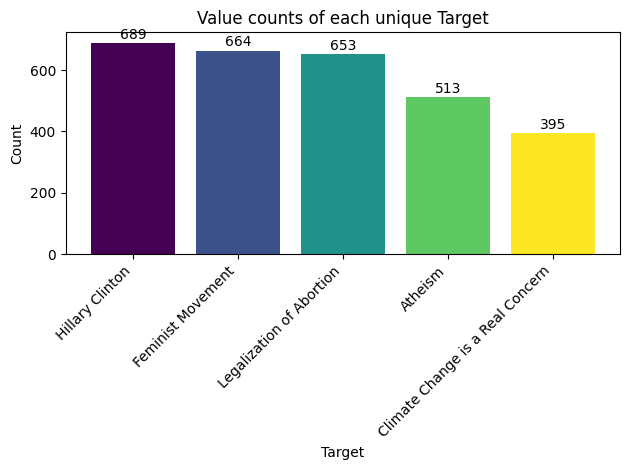

In [383]:
# Visual representation of counts of each unique target type

unique_targets = cleaned_train_data["Target"].value_counts()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_targets)))

fig, ax = plt.subplots()
bars = ax.bar(unique_targets.index, unique_targets.values, color=colors)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Value counts of each unique Target')

for bar, count in zip(bars, unique_targets.values):
    ax.annotate(count, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', fontsize=10, color='black')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

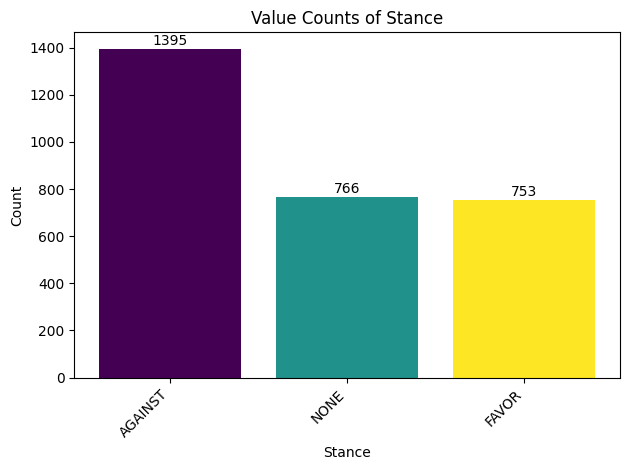

In [384]:
# Visual representation of counts of each unique stance type
unique_stances = cleaned_train_data["Stance"].value_counts()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_stances)))

fig, ax = plt.subplots()
bars = ax.bar(unique_stances.index, unique_stances.values, color=colors)
plt.xlabel('Stance')
plt.ylabel('Count')
plt.title('Value Counts of Stance')

for bar, count in zip(bars, unique_stances.values):
    ax.annotate(count, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', fontsize=10, color='black')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

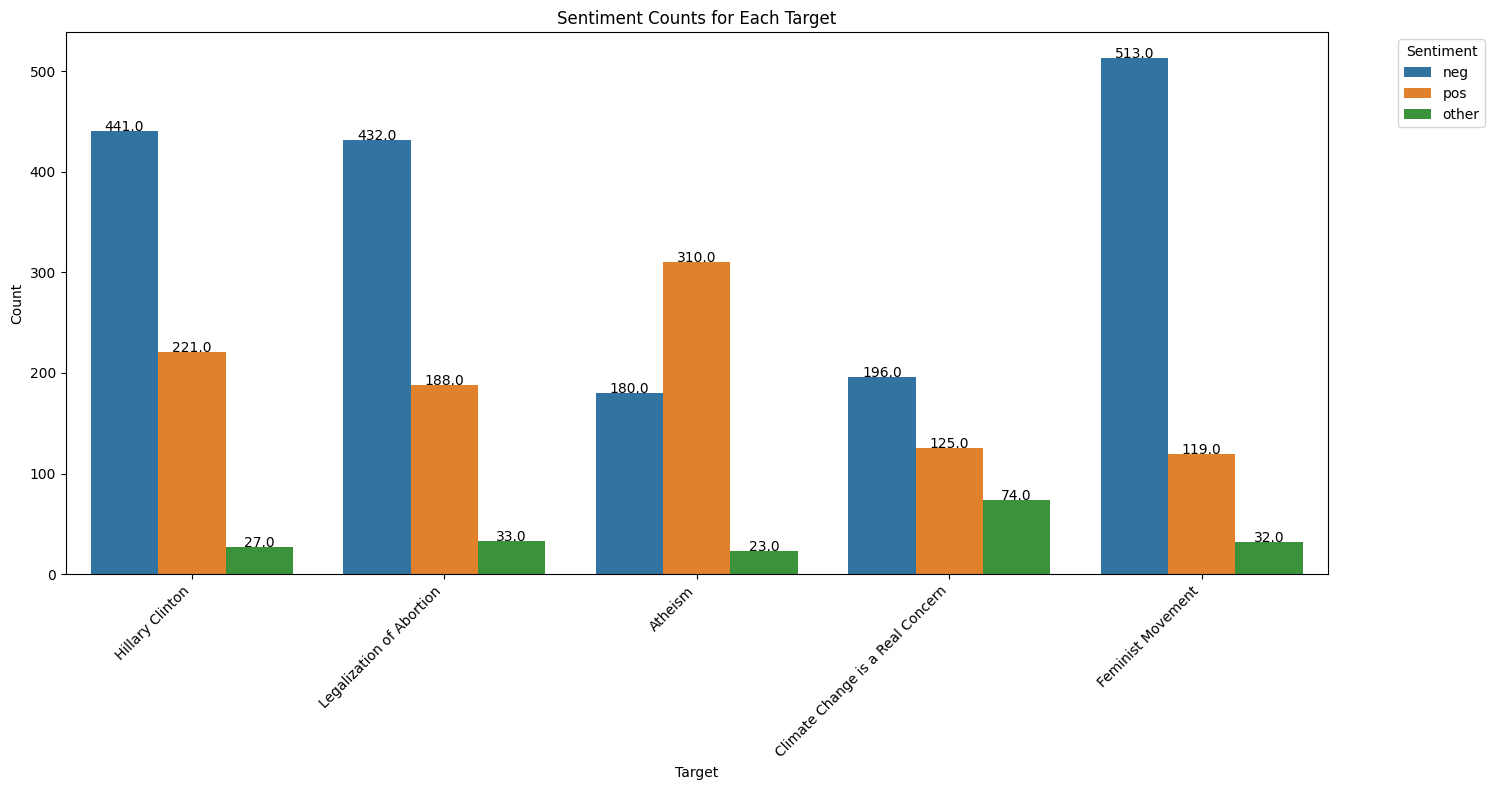

In [385]:
# Visual representation of stance counts based on each unique Target type
plt.figure(figsize=(15, 8))
ax = sns.countplot(x="Target", hue="Sentiment", data=cleaned_train_data)

plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Stance Counts with respect to Each Target')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Sentiment')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline', fontsize=10, color='black')
plt.tight_layout()
plt.show()

In [386]:
# Function to generate the word cloud for each target type
def generate_wordcloud(data, target_column, text_column):
    # Get unique target values
    unique_targets = data[target_column].unique()

    # Create a word cloud for each unique target
    for target in unique_targets:
        target_data = data[data[target_column] == target]
        target_text = " ".join(target_data[text_column])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(target_text)

        # Display the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for {target}', fontweight='bold')
        plt.axis('off')
        plt.show()

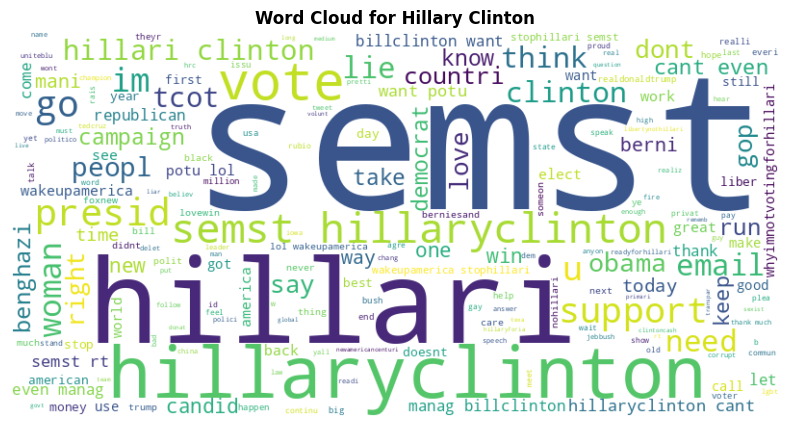

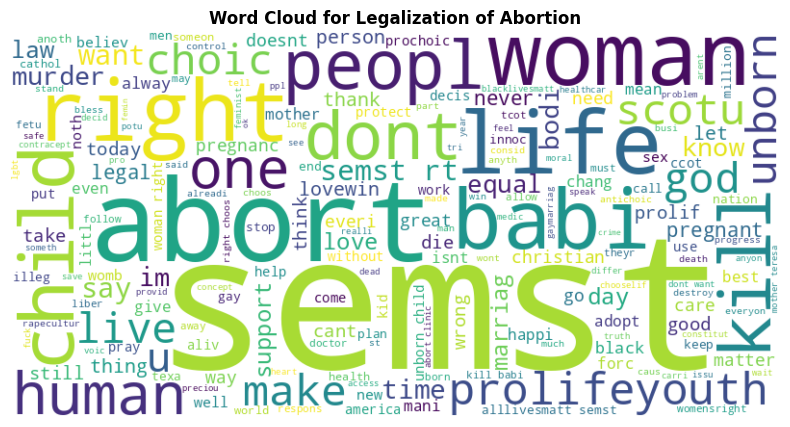

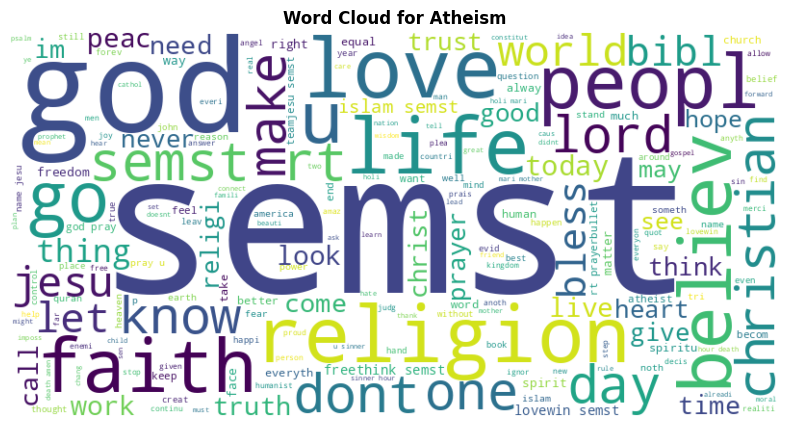

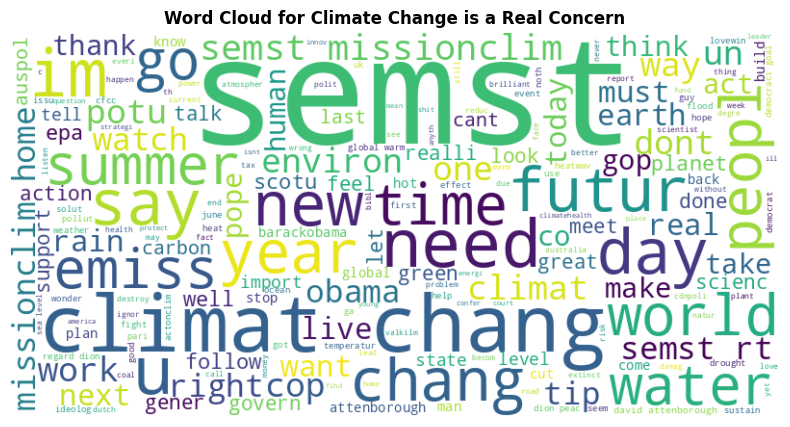

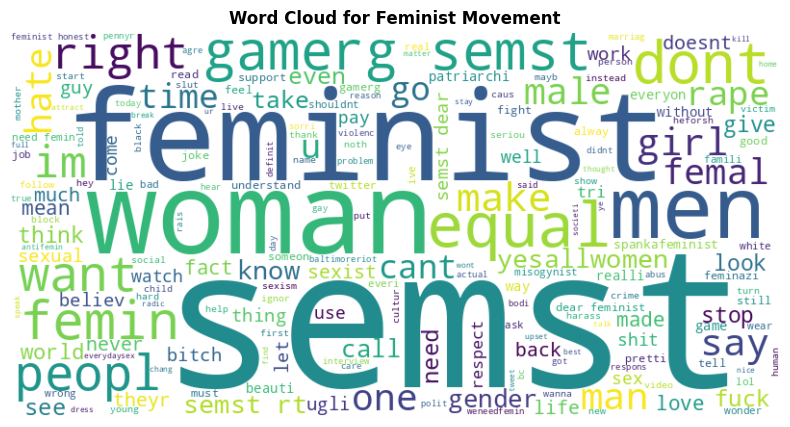

In [387]:
# Generating word clouds for cleaned_train_data based on target
generate_wordcloud(cleaned_train_data, 'Target', 'Tweet')


In [388]:
cleaned_train_data.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,tedcruz handovertheserv wipe clean k delet ema...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,hillari best choic truli want continu progress...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,theview think countri readi femal pre cant eve...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,gave unhealthi amount hardearn money away big ...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,portiaaboulg thank ad list,Hillary Clinton,NONE,3. The tweet is not explicitly expressing opi...,pos


**Data Transformation**

Categorical to numerical transformation

In [389]:
#Encode the target for train data set
encode_target = {
    "Hillary Clinton" : 0,
    "Legalization of Abortion"  : 1,
    "Atheism" : 2,
    "Climate Change is a Real Concern" : 3,
    "Feminist Movement"  : 4
}
cleaned_train_data["Target"] = cleaned_train_data["Target"].apply(lambda x: encode_target[x])
cleaned_train_data.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,tedcruz handovertheserv wipe clean k delet ema...,0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,hillari best choic truli want continu progress...,0,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,theview think countri readi femal pre cant eve...,0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,gave unhealthi amount hardearn money away big ...,0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,portiaaboulg thank ad list,0,NONE,3. The tweet is not explicitly expressing opi...,pos


In [391]:
#Encode the stance for train data set
encode_stance = {
    "AGAINST" : 0,
    "FAVOR"  : 1,
    "NONE" : 2,
}
cleaned_train_data["Stance"] = cleaned_train_data["Stance"].apply(lambda x: encode_stance[x])
cleaned_train_data.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,tedcruz handovertheserv wipe clean k delet ema...,0,0,1. The tweet explicitly expresses opinion abo...,neg
1,hillari best choic truli want continu progress...,0,1,1. The tweet explicitly expresses opinion abo...,pos
2,theview think countri readi femal pre cant eve...,0,0,1. The tweet explicitly expresses opinion abo...,neg
3,gave unhealthi amount hardearn money away big ...,0,0,1. The tweet explicitly expresses opinion abo...,neg
4,portiaaboulg thank ad list,0,2,3. The tweet is not explicitly expressing opi...,pos


In [393]:
#Converting the tweet to a list type
train_list = list()
lines = cleaned_train_data["Tweet"].values.tolist()
for line in lines:
    words = line.split(" ")
    train_list.append(words)

In [395]:
# Finding the  maximum length for cleaned_train_data
max_lengths_train = []
max_lengths_test = []

for tweet in train_list:
    max_length = len(tweet)
    max_lengths_train.append(max_length)
max_length_train = max(max_lengths_train, default=0)
print("Maximum tweet length in training data:", max_length_train)

Maximum tweet length in training data: 18


In [396]:
#Tokenizing each word in the cleaned_train_data

tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(train_list)
sequences = tokenizer_obj.texts_to_sequences(train_list)

word_index = tokenizer_obj.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - '+str(vocab_size))

unique tokens - 7462
vocab_size - 7463


In [397]:
#Added padding to the tweet data
max_length = 50
validation_split = 0.20
tweet_padding = pad_sequences(sequences, maxlen=max_length, padding='post')
category_target = cleaned_train_data["Target"].values
category_stance = cleaned_train_data["Stance"].values

In [398]:
# Train and validation split for cleaned_train_data

indices = np.arange(tweet_padding.shape[0])
np.random.shuffle(indices)
lines_pad_tweets = tweet_padding[indices]
category_target = category_target[indices]
category_stance = category_stance[indices]

n_target_values = np.max(category_target) + 1
n_stance_values = np.max(category_stance) + 1

Y_target = np.eye(n_target_values)[category_target]
Y_stance = np.eye(n_stance_values)[category_stance]

num_validation_samples = int(validation_split * lines_pad_tweets.shape[0])

X_train_pad_tweets = lines_pad_tweets[:-num_validation_samples]
y_train_target = Y_target[:-num_validation_samples]
y_train_stance = Y_stance[:-num_validation_samples]

X_val_pad_tweets = lines_pad_tweets[-num_validation_samples:]
y_val_target = Y_target[-num_validation_samples:]
y_val_stance = Y_stance[-num_validation_samples:]

In [399]:
#Print shape of train and validation split for train dataset for both tweets, target and Stance

print("Shape of X_train_pad_tweets",X_train_pad_tweets.shape)
print("Shape of y_train_target",y_train_target.shape)
print("Shape of y_train_stance",y_train_stance.shape)

print("Shape of X_val_pad_tweets",X_val_pad_tweets.shape)
print("Shape of y_val_target",y_val_target.shape)
print("Shape of y_val_stance",y_val_stance.shape)

Shape of X_train_pad_tweets (2332, 50)
Shape of y_train_target (2332, 5)
Shape of y_train_stance (2332, 3)
Shape of X_val_pad_tweets (582, 50)
Shape of y_val_target (582, 5)
Shape of y_val_stance (582, 3)


In [400]:
X_train_pad_tweets


array([[5228,  482, 5229, ...,    0,    0,    0],
       [ 121,    3,  873, ...,    0,    0,    0],
       [  20,    8,   56, ...,    0,    0,    0],
       ...,
       [  56,  901, 1574, ...,    0,    0,    0],
       [  63, 2248, 1021, ...,    0,    0,    0],
       [  16,  890,  451, ...,    0,    0,    0]], dtype=int32)

In [401]:
y_train_target

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [402]:
y_train_stance

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

**Model Creation**

In [405]:
# REad the glove word vectors which is pre-trained word embeddings,
# useful for various natural language processing (NLP) tasks.

file = open('/content/drive/MyDrive/glove.twitter.27B.50d.txt', encoding='utf-8')

glove_vectors = dict()
for line in file:
  values = line.split()
  word = values[0]
  features = np.asarray(values[1:])
  glove_vectors[word] = features

file.close()

In [406]:
# Creating an embedding matrix E_T used to initialize the word embeddings to model.
# This embedding matrix  provide a dense representation of words to the model.

embedding_dim = 50
E_T = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = glove_vectors.get(word)
    if embedding_vector is not None:
        E_T[i] = embedding_vector

In [407]:
# Shape of the embedding matrix
E_T.shape

(7463, 50)

In [408]:
# Defining the unique type of stance classes
num_classes = 3

In [409]:
#Base Model

# Defining input layers for "target" and "tweets"
input_tweets = Input(shape=(max_length,), name="input_tweets")
input_target = Input(shape=(5,), name="input_target")


# Embedding layer for both inputs
# Convert discrete words  into dense vector representations
# 		input_dim: Specifies the size of the input vocabulary.
#     output_dim: Specifies the dimensionality of the word embeddings.
#		  input_length: Specifies the length of input sequences.

embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length)

# Applying embedding layer to both inputs
embedded_tweets = embedding_layer(input_tweets)
embedded_target = embedding_layer(input_target)


# We have used LSTM layer because it is a type of recurrent neural network layer
# for processing sequences of data for  (NLP) tasks.
# LSTM networks capture long-range dependencies and patterns in sequential data.
# units=32: Specifies the number of LSTM units  in the layer.
# dropout=0.2: Applies dropout to the inputs of the LSTM layer
# recurrent_dropout=0.25: Applies dropout to the recurrent connections within LSTM.
lstm_layer = LSTM(units=32, dropout=0.2, recurrent_dropout=0.25)

# LSTM layer for each input
lstm_tweets = lstm_layer(embedded_tweets)
lstm_target = lstm_layer(embedded_target)

# Concatenate the outputs of LSTM layers
concatenated = Concatenate()([lstm_tweets,lstm_target])

# Creating a dense feedforward neural network layer  for classification
# num_classes: number of stance classes
# activation='softmax': Used  for multi-class classification tasks.
output = Dense(num_classes, activation='softmax', name="output")(concatenated)

# Creating the model
model = Model(inputs=[input_target, input_tweets], outputs=output)

# Creating f1Score metric
f1_metric = F1Score(average='weighted')

# Compile the model with categorical_accuracy and  F1 score metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy', f1_metric])

# Display model summary
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_tweets (InputLayer)   [(None, 50)]                 0         []                            
                                                                                                  
 input_target (InputLayer)   [(None, 5)]                  0         []                            
                                                                                                  
 embedding_5 (Embedding)     multiple                     373150    ['input_tweets[0][0]',        
                                                                     'input_target[0][0]']        
                                                                                                  
 lstm_4 (LSTM)               (None, 32)                   10624     ['embedding_5[0][0]',   

In [410]:
#function to plot the models training history ones training has completed.
from itertools import cycle
def plotter(history_hold, metric = 'binary_crossentropy', ylim=[0.0, 1.0]):
  cycol = cycle('bgrcmk')
  for name, item in history_hold.items():
    y_train = item.history[metric]
    y_val = item.history['val_' + metric]
    x_train = np.arange(0,len(y_val))

    c=next(cycol)

    plt.plot(x_train, y_train, c+'-', label=name+'_train')
    plt.plot(x_train, y_val, c+'--', label=name+'_val')

  plt.legend()
  plt.xlim([1, max(plt.xlim())])
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel(metric)
  plt.grid(True)

In [411]:
# Returns the list of callback function
def get_callbacks(name):
  return [
    tf.keras.callbacks.TensorBoard(logdir/name, histogram_freq=1),
  ]

In [412]:
# Training the model

# {"input_target": y_train_target, "input_tweets": X_train_pad_tweets}: Specifies the training input data.
# {"output": y_train_stance}: Specifies the target  data
# batch_size=32: Specifies the number of samples  in each training batch.
# epochs=50: Specifies the number o of times the model goes through entire training dataset.
# validation_data: Specifies the validation data to use during training.
# callbacks=get_callbacks('models/with_TL'): Specifies  list of callback functions.
# verbose=1:  training progress displayed during training.

m_histories = {}
m_histories['with_TL'] = model.fit(
    {"input_target": y_train_target, "input_tweets": X_train_pad_tweets},
    {"output": y_train_stance},
    batch_size=32,
    epochs=50,
    validation_data=({"input_target": y_val_target, "input_tweets": X_val_pad_tweets}, {"output": y_val_stance}),
    callbacks=get_callbacks('models/with_TL'),
    verbose=1
)

Epoch 1/50
73/73 [==============================] - 36s 401ms/step - loss: 1.0551 - categorical_accuracy: 0.4833 - f1_score: 0.3209 - val_loss: 1.0810 - val_categorical_accuracy: 0.4502 - val_f1_score: 0.2795
Epoch 2/50
73/73 [==============================] - 22s 297ms/step - loss: 1.0489 - categorical_accuracy: 0.4858 - f1_score: 0.3177 - val_loss: 1.0694 - val_categorical_accuracy: 0.4502 - val_f1_score: 0.2795
Epoch 3/50
73/73 [==============================] - 22s 307ms/step - loss: 1.0438 - categorical_accuracy: 0.4858 - f1_score: 0.3177 - val_loss: 1.0739 - val_categorical_accuracy: 0.4502 - val_f1_score: 0.2795
Epoch 4/50
73/73 [==============================] - 20s 271ms/step - loss: 1.0358 - categorical_accuracy: 0.4858 - f1_score: 0.3177 - val_loss: 1.0574 - val_categorical_accuracy: 0.4502 - val_f1_score: 0.2795
Epoch 5/50
73/73 [==============================] - 22s 303ms/step - loss: 1.0278 - categorical_accuracy: 0.4708 - f1_score: 0.3632 - val_loss: 1.0535 - val_categor

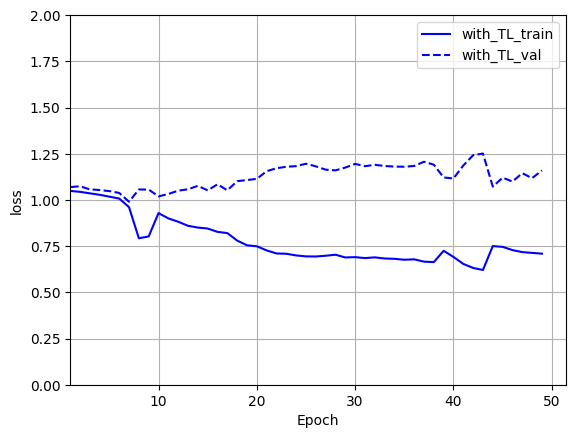

In [414]:
#Plotting the model loss
plotter(m_histories, ylim=[0.0, 2], metric = 'loss')

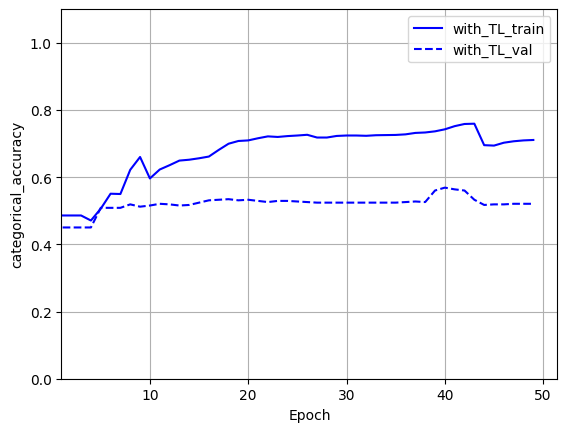

In [415]:
#Plotting the model accuracy
plotter(m_histories, ylim=[0.0, 1.1], metric = 'categorical_accuracy')

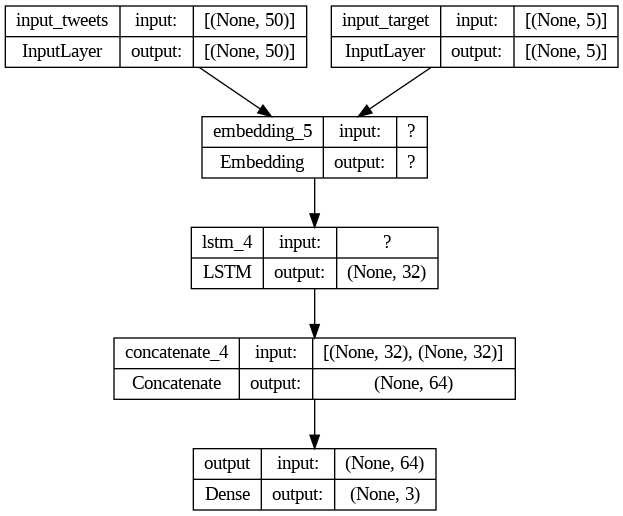

In [416]:
#Plotting shapes of model
plot_model(model, show_shapes=True, show_layer_names=True)

In [417]:
#Added dense layer , dropout layer and flattened the input .
#Also added weights to embedded_layer and set trainable to False.

# Define input layers for "target" and "tweets"
input_target = Input(shape=(5,), name="input_target")
input_tweets = Input(shape=(max_length,), name="input_tweets")

# Embedding layer for input_tweets
# Convert discrete words  into dense vector representations
#     input_dim: Specifies the size of the input vocabulary.
#     output_dim: Specifies the dimensionality of the word embeddings.
#     input_length: Specifies the length of input sequences.

embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length,weights=[E_T], trainable=False)

# Apply the embedding layer to input_tweets
embedded_tweets = embedding_layer(input_tweets)

# LSTM layer for embedded_tweets only

# We have used LSTM layer because it is a type of recurrent neural network layer
# for processing sequences of data for  (NLP) tasks.
# LSTM networks capture long-range dependencies and patterns in sequential data.
# units=32: Specifies the number of LSTM units  in the layer.
# dropout=0.2: Applies dropout to the inputs of the LSTM layer
# recurrent_dropout=0.25: Applies dropout to the recurrent connections within LSTM.

lstm_layer = LSTM(units=256, dropout=0.3, recurrent_dropout=0.25)
lstm_tweets = lstm_layer(embedded_tweets)

# Flatten the concatenated output
# Reshapes the data into a 1D vector.
flattened = Flatten()(Concatenate()([lstm_tweets,input_target]))

# Additional dense and dropout layers
# dense layer with 512 units
# ReLU activation function to learn more complex function.
dense_layer_1 = Dense(512, activation='relu')(flattened)
dropout_1 = Dropout(0.5)(dense_layer_1)

# Creating a dense feedforward neural network layer  for classification
# num_classes: number of stance classes
# activation='softmax': Used  for multi-class classification tasks.
output = Dense(num_classes, activation='softmax', name="output")(dropout_1)

# Creating the model
model = Model(inputs=[input_target, input_tweets], outputs=output)

# Creating f1Score metric
f1_metric = F1Score(average='weighted')

# Compile the model with categorical_accuracy and  F1 score metric

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy',f1_metric])

# Display model summary
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_tweets (InputLayer)   [(None, 50)]                 0         []                            
                                                                                                  
 embedding_6 (Embedding)     (None, 50, 50)               373150    ['input_tweets[0][0]']        
                                                                                                  
 lstm_5 (LSTM)               (None, 256)                  314368    ['embedding_6[0][0]']         
                                                                                                  
 input_target (InputLayer)   [(None, 5)]                  0         []                            
                                                                                            

In [418]:
m_histories = {}

In [419]:
# Training the model

# {"input_target": y_train_target, "input_tweets": X_train_pad_tweets}: Specifies the training input data.
# {"output": y_train_stance}: Specifies the target  data
# batch_size=32: Specifies the number of samples  in each training batch.
# epochs=50: Specifies the number o of times the model goes through entire training dataset.
# validation_data: Specifies the validation data to use during training.
# callbacks=get_callbacks('models/with_TL'): Specifies  list of callback functions.
# verbose=1:  training progress displayed during training.

m_histories['with_TL1'] = model.fit(
    {"input_target": y_train_target, "input_tweets": X_train_pad_tweets},
    {"output": y_train_stance},
    batch_size=32,
    epochs=50,
    validation_data=({"input_target": y_val_target, "input_tweets": X_val_pad_tweets}, {"output": y_val_stance}),
    callbacks=get_callbacks('models/with_TL1'),
    verbose=1
)

Epoch 1/50
73/73 [==============================] - 26s 291ms/step - loss: 1.0126 - categorical_accuracy: 0.5412 - f1_score: 0.4387 - val_loss: 1.0100 - val_categorical_accuracy: 0.5086 - val_f1_score: 0.3875
Epoch 2/50
73/73 [==============================] - 17s 232ms/step - loss: 0.9726 - categorical_accuracy: 0.5553 - f1_score: 0.4462 - val_loss: 1.0066 - val_categorical_accuracy: 0.5086 - val_f1_score: 0.3875
Epoch 3/50
73/73 [==============================] - 17s 231ms/step - loss: 0.9677 - categorical_accuracy: 0.5562 - f1_score: 0.4454 - val_loss: 1.0012 - val_categorical_accuracy: 0.5086 - val_f1_score: 0.3875
Epoch 4/50
73/73 [==============================] - 19s 262ms/step - loss: 0.9620 - categorical_accuracy: 0.5553 - f1_score: 0.4446 - val_loss: 1.0033 - val_categorical_accuracy: 0.5086 - val_f1_score: 0.3875
Epoch 5/50
73/73 [==============================] - 17s 238ms/step - loss: 0.9677 - categorical_accuracy: 0.5566 - f1_score: 0.4460 - val_loss: 1.0049 - val_categor

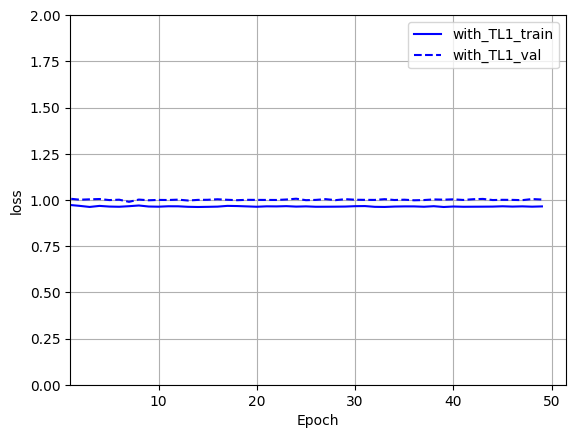

In [420]:
#Plotting the model loss
plotter(m_histories, ylim=[0.0, 2], metric = 'loss')


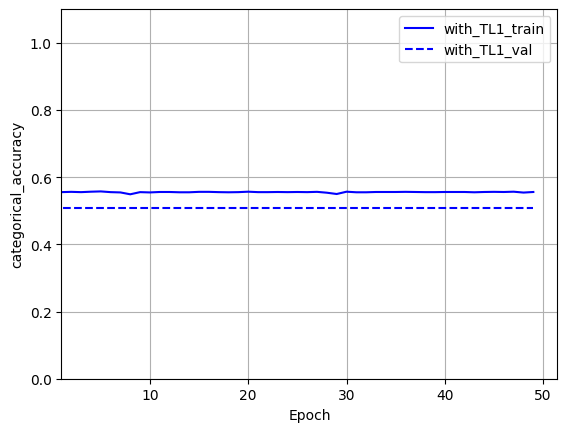

In [421]:
#Plotting the model accuracy
plotter(m_histories, ylim=[0.0, 1.1], metric = 'categorical_accuracy')

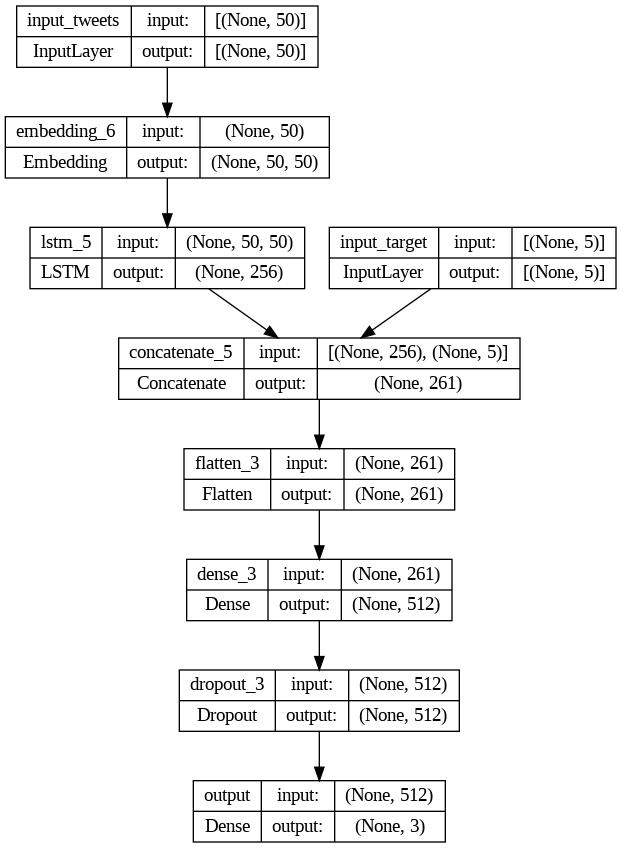

In [422]:
# Plotting shapes
plot_model(model, show_shapes=True, show_layer_names=True)

inference1 : The model is overfitting hence proceding forward to use early stopping method.

In [423]:
# Define early stopping callback
# Monitor and stop training under certain conditions
# patience=20 : no of epochs the training can continue without improvement.
#restore_best_weights=True -  model weights rollback to best validation accuracy.
early_stopping = EarlyStopping(
    monitor='val_categorical_accuracy',
    patience=20,
    restore_best_weights=True,
)

In [424]:
# Training the model

# Define input layers for "target" and "tweets"
input_target = Input(shape=(5,), name="input_target")
input_tweets = Input(shape=(max_length,), name="input_tweets")

# Embedding layer for input_tweets
# Convert discrete words  into dense vector representations
#     input_dim: Specifies the size of the input vocabulary.
#     output_dim: Specifies the dimensionality of the word embeddings.
#     input_length: Specifies the length of input sequences.
#     weights=[E_T] - define weights to the layers
#     trainable=False: E_T shouldnot fine tune duringtraining
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length,weights=[E_T], trainable=False)

# Apply the embedding layer to input_tweets
embedded_tweets = embedding_layer(input_tweets)

# LSTM layer for embedded_tweets
lstm_layer = LSTM(units=256, dropout=0.3, recurrent_dropout=0.25)
lstm_tweets = lstm_layer(embedded_tweets)

# Flatten the concatenated output
flattened = Flatten()(Concatenate()([lstm_tweets,input_target]))

# Additional dense and dropout layers
dense_layer_1 = Dense(512, activation='relu')(flattened)
dropout_1 = Dropout(0.5)(dense_layer_1)

# Dense layer for classification
output = Dense(num_classes, activation='softmax', name="output")(dropout_1)

# Create the model
model = Model(inputs=[input_target, input_tweets], outputs=output)

# Create an instance of the F1Score metric
f1_metric = F1Score(average='weighted')

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy',f1_metric])

# Display model summary
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_tweets (InputLayer)   [(None, 50)]                 0         []                            
                                                                                                  
 embedding_7 (Embedding)     (None, 50, 50)               373150    ['input_tweets[0][0]']        
                                                                                                  
 lstm_6 (LSTM)               (None, 256)                  314368    ['embedding_7[0][0]']         
                                                                                                  
 input_target (InputLayer)   [(None, 5)]                  0         []                            
                                                                                            

In [425]:
# Training the model

# {"input_target": y_train_target, "input_tweets": X_train_pad_tweets}: Specifies the training input data.
# {"output": y_train_stance}: Specifies the target  data
# batch_size=32: Specifies the number of samples  in each training batch.
# epochs=50: Specifies the number o of times the model goes through entire training dataset.
# validation_data: Specifies the validation data to use during training.
# callbacks=[early_stopping]: Specifies  list of callback functions but added earlystoppingin the callbacks.
# verbose=1:  training progress displayed during training.
m_histories['with_TL2'] = model.fit(
    {"input_target": y_train_target, "input_tweets": X_train_pad_tweets},
    {"output": y_train_stance},
    batch_size=32,
    epochs=50,
    validation_data=({"input_target": y_val_target, "input_tweets": X_val_pad_tweets}, {"output": y_val_stance}),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
73/73 [==============================] - 21s 239ms/step - loss: 1.0080 - categorical_accuracy: 0.5386 - f1_score: 0.4373 - val_loss: 1.0150 - val_categorical_accuracy: 0.5086 - val_f1_score: 0.3875
Epoch 2/50
73/73 [==============================] - 16s 221ms/step - loss: 0.9727 - categorical_accuracy: 0.5545 - f1_score: 0.4432 - val_loss: 1.0009 - val_categorical_accuracy: 0.5086 - val_f1_score: 0.3875
Epoch 3/50
73/73 [==============================] - 16s 222ms/step - loss: 0.9712 - categorical_accuracy: 0.5553 - f1_score: 0.4441 - val_loss: 1.0020 - val_categorical_accuracy: 0.5086 - val_f1_score: 0.3875
Epoch 4/50
73/73 [==============================] - 16s 221ms/step - loss: 0.9644 - categorical_accuracy: 0.5553 - f1_score: 0.4448 - val_loss: 1.0074 - val_categorical_accuracy: 0.5086 - val_f1_score: 0.3875
Epoch 5/50
73/73 [==============================] - 16s 225ms/step - loss: 0.9645 - categorical_accuracy: 0.5540 - f1_score: 0.4465 - val_loss: 1.0055 - val_categor

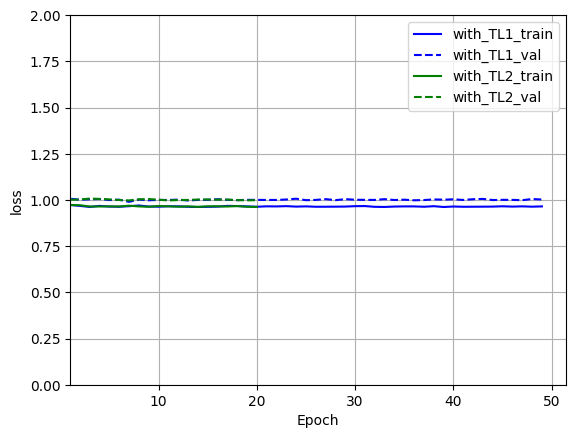

In [426]:
#Plotting the model loss
plotter(m_histories, ylim=[0.0, 2], metric = 'loss')

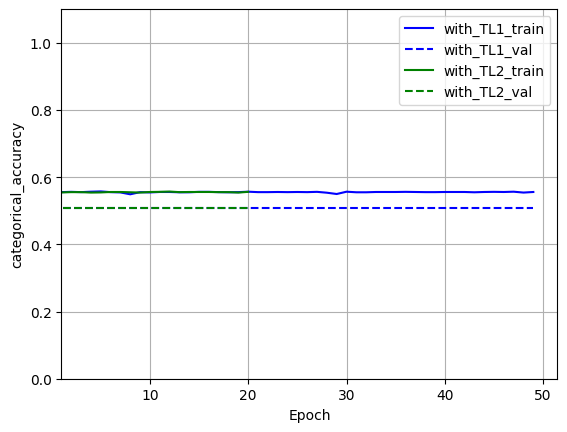

In [427]:
#Plotting the model accuracy
plotter(m_histories, ylim=[0.0, 1.1], metric = 'categorical_accuracy')

Inference 2: since the model is ovefitting again hence using regularization technique and adam optimizer.

In [429]:
# Define input layers for "target" and "tweets"
input_target = Input(shape=(5,), name="input_target")
input_tweets = Input(shape=(max_length,), name="input_tweets")

# Embedding layer for input_tweets
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length, weights=[E_T], trainable=False)

# Apply the embedding layer to input_tweets
embedded_tweets = embedding_layer(input_tweets)

# LSTM layer for embedded_tweets
lstm_layer = LSTM(units=256, dropout=0.3, recurrent_dropout=0.25)
lstm_tweets = lstm_layer(embedded_tweets)

# Flatten the concatenated output
flattened = Flatten()(Concatenate()([lstm_tweets,input_target]))

# Additional dense and dropout layers with L1 regularization
# L1 regularization to prevent overfitting
# l1=0.001 - this is taken after various hit and trial method
dense_layer_1 = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001))(flattened)
dropout_1 = Dropout(0.3)(dense_layer_1)

# Dense layer for classification
output = Dense(num_classes, activation='softmax', name="output")(dropout_1)

# Create the model
model = Model(inputs=[input_target, input_tweets], outputs=output)

# Creating F1Score metric
f1_metric = F1Score(average='weighted')

# Compile the model with the specified optimizer
# LearningRateScheduler callback is used to adjust the learning rate during training
# We have used AdamW optimizer which includes weight decay to prevent over fitting
learning_rate = 0.0001
model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate = learning_rate),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy',f1_metric]
)
# Display model summary
model.summary()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_tweets (InputLayer)   [(None, 50)]                 0         []                            
                                                                                                  
 embedding_8 (Embedding)     (None, 50, 50)               373150    ['input_tweets[0][0]']        
                                                                                                  
 lstm_7 (LSTM)               (None, 256)                  314368    ['embedding_8[0][0]']         
                                                                                                  
 input_target (InputLayer)   [(None, 5)]                  0         []                            
                                                                                            

In [430]:
m_histories['with_TL3'] = model.fit(
    {"input_target": y_train_target, "input_tweets": X_train_pad_tweets},
    {"output": y_train_stance},
    batch_size=32,
    epochs=50,
    validation_data=({"input_target": y_val_target, "input_tweets": X_val_pad_tweets}, {"output": y_val_stance}),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
73/73 [==============================] - 21s 229ms/step - loss: 6.7541 - categorical_accuracy: 0.4121 - f1_score: 0.3650 - val_loss: 6.2779 - val_categorical_accuracy: 0.4502 - val_f1_score: 0.2795
Epoch 2/50
73/73 [==============================] - 16s 226ms/step - loss: 5.8563 - categorical_accuracy: 0.4957 - f1_score: 0.3406 - val_loss: 5.4753 - val_categorical_accuracy: 0.4811 - val_f1_score: 0.3453
Epoch 3/50
73/73 [==============================] - 18s 246ms/step - loss: 5.1044 - categorical_accuracy: 0.5081 - f1_score: 0.4097 - val_loss: 4.8067 - val_categorical_accuracy: 0.4948 - val_f1_score: 0.3847
Epoch 4/50
73/73 [==============================] - 18s 249ms/step - loss: 4.4585 - categorical_accuracy: 0.5326 - f1_score: 0.4356 - val_loss: 4.1894 - val_categorical_accuracy: 0.5103 - val_f1_score: 0.4003
Epoch 5/50
73/73 [==============================] - 16s 224ms/step - loss: 3.9073 - categorical_accuracy: 0.5386 - f1_score: 0.4473 - val_loss: 3.6774 - val_categor

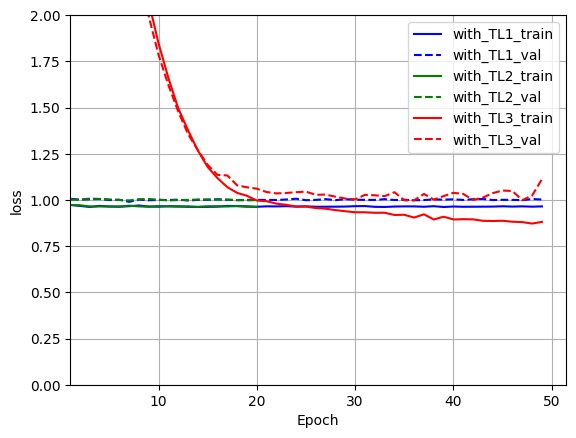

In [442]:
plotter(m_histories, ylim=[0.0, 2], metric = 'loss')

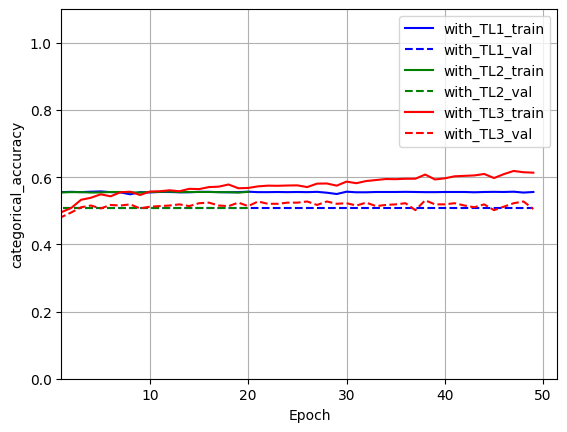

In [443]:
plotter(m_histories, ylim=[0.0, 1.1], metric = 'categorical_accuracy')

**Data Augmentation**

In [444]:
nltk.download('wordnet')
# Function to replace a word with a synonym
def synonym_replacement(text, n=1):
    words = text.split()
    new_words = words.copy()

    for _ in range(n):
        random_word_idx = random.randint(0, len(new_words) - 1)
        random_word = new_words[random_word_idx]
        synonyms = get_synonyms(random_word)

        if synonyms:
            synonym = random.choice(synonyms)
            new_words[random_word_idx] = synonym

    return ' '.join(new_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [445]:
# Function to get synonyms of a word using WordNet
def get_synonyms(word):
    synonyms = set()

    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonyms.add(synonym)

    synonyms.discard(word)
    return list(synonyms)

In [446]:
augmented_data = []
augmentation_factor = 3

for index, row in cleaned_train_data.iterrows():
    original_tweet = row['Tweet']
    for _ in range(augmentation_factor):
        augmented_tweet = synonym_replacement(original_tweet)
        augmented_row = {
            'Tweet': augmented_tweet,
            'Target': row['Target'],
            'Stance': row['Stance'],
            'Opinion Towards': row['Opinion Towards'],
            'Sentiment': row['Sentiment']
        }

        augmented_data.append(augmented_row)

# New DataFrame with the augmented data
augmented_df = pd.DataFrame(augmented_data)

# Concatenating the original and augmented DataFrames
combined_df = pd.concat([cleaned_train_data, augmented_df], ignore_index=True)


In [447]:
combined_df

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,tedcruz handovertheserv wipe clean k delet ema...,0,0,1. The tweet explicitly expresses opinion abo...,neg
1,hillari best choic truli want continu progress...,0,1,1. The tweet explicitly expresses opinion abo...,pos
2,theview think countri readi femal pre cant eve...,0,0,1. The tweet explicitly expresses opinion abo...,neg
3,gave unhealthi amount hardearn money away big ...,0,0,1. The tweet explicitly expresses opinion abo...,neg
4,portiaaboulg thank ad list,0,2,3. The tweet is not explicitly expressing opi...,pos
...,...,...,...,...,...
11651,equal right born way yet liberallog liber life...,1,0,2. The tweet does NOT expresses opinion about ...,neg
11652,equal right born way yet liberallog liber life...,1,0,2. The tweet does NOT expresses opinion about ...,neg
11653,potu seal legaci double u doz win gop agenda s...,1,0,2. The tweet does NOT expresses opinion about ...,neg
11654,potu seal legaci w doz win gop docket still re...,1,0,2. The tweet does NOT expresses opinion about ...,neg


In [448]:
augmented_tweet_list = list()
lines = combined_df["Tweet"].values.tolist()
for line in lines:
    words = line.split(" ")
    augmented_tweet_list.append(words)

In [449]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Tokenize each word in the cleaned train and test data

tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(augmented_tweet_list)
sequences = tokenizer_obj.texts_to_sequences(augmented_tweet_list)

word_index = tokenizer_obj.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - '+str(vocab_size))

unique tokens - 9260
vocab_size - 9261


In [450]:
#Added padding to the tweet data
max_length = 50
validation_split = 0.20
aug_tweet_padding = pad_sequences(sequences, maxlen=max_length, padding='post')
aug_category_target = combined_df["Target"].values
aug_category_stance = combined_df["Stance"].values

In [451]:
# Train and validation split for cleaned_train_data

indices = np.arange(aug_tweet_padding.shape[0])
np.random.shuffle(indices)
lines_pad_tweets = aug_tweet_padding[indices]
aug_category_target = aug_category_target[indices]
aug_category_stance = aug_category_stance[indices]

n_target_values = np.max(aug_category_target) + 1
n_stance_values = np.max(aug_category_stance) + 1

Y_target = np.eye(n_target_values)[aug_category_target]
Y_stance = np.eye(n_stance_values)[aug_category_stance]

num_validation_samples = int(validation_split * lines_pad_tweets.shape[0])

X_train_pad_tweets = lines_pad_tweets[:-num_validation_samples]
y_train_target = Y_target[:-num_validation_samples]
y_train_stance = Y_stance[:-num_validation_samples]

X_val_pad_tweets = lines_pad_tweets[-num_validation_samples:]
y_val_target = Y_target[-num_validation_samples:]
y_val_stance = Y_stance[-num_validation_samples:]

In [452]:
m_histories['with_TL4'] = model.fit(
    {"input_target": y_train_target, "input_tweets": X_train_pad_tweets},
    {"output": y_train_stance},
    batch_size=32,
    epochs=50,
    validation_data=({"input_target": y_val_target, "input_tweets": X_val_pad_tweets}, {"output": y_val_stance}),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
292/292 [==============================] - 71s 245ms/step - loss: 0.9836 - categorical_accuracy: 0.5471 - f1_score: 0.4826 - val_loss: 0.8812 - val_categorical_accuracy: 0.5826 - val_f1_score: 0.4977
Epoch 2/50
292/292 [==============================] - 68s 233ms/step - loss: 0.9626 - categorical_accuracy: 0.5590 - f1_score: 0.5042 - val_loss: 0.8888 - val_categorical_accuracy: 0.6083 - val_f1_score: 0.5707
Epoch 3/50
292/292 [==============================] - 66s 226ms/step - loss: 0.9562 - categorical_accuracy: 0.5620 - f1_score: 0.5145 - val_loss: 0.8896 - val_categorical_accuracy: 0.6053 - val_f1_score: 0.5636
Epoch 4/50
292/292 [==============================] - 69s 237ms/step - loss: 0.9494 - categorical_accuracy: 0.5647 - f1_score: 0.5183 - val_loss: 0.8830 - val_categorical_accuracy: 0.6002 - val_f1_score: 0.5545
Epoch 5/50
292/292 [==============================] - 69s 235ms/step - loss: 0.9466 - categorical_accuracy: 0.5613 - f1_score: 0.5185 - val_loss: 0.8934 - v

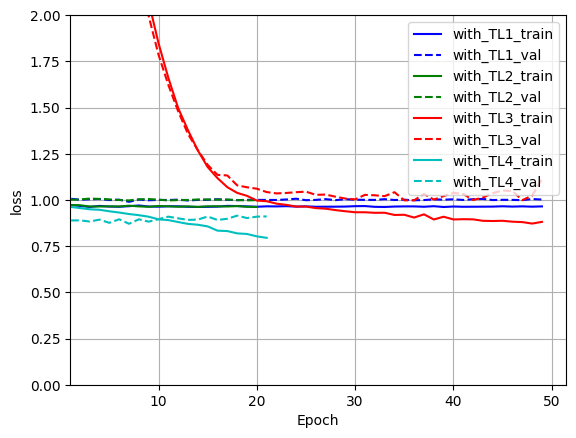

In [453]:
plotter(m_histories, ylim=[0.0, 2], metric = 'loss')

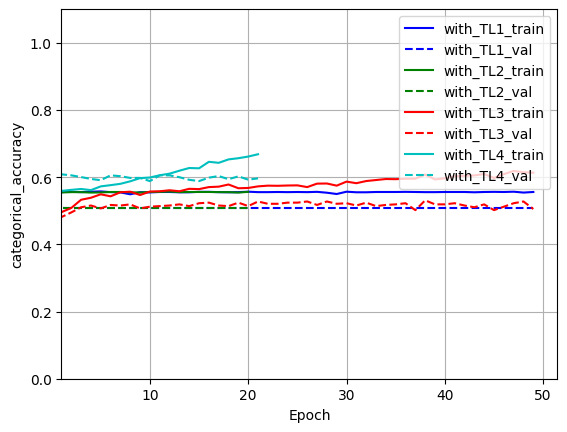

In [454]:
plotter(m_histories, ylim=[0.0, 1.1], metric = 'categorical_accuracy')

**Model Evaluation**

In [481]:
#Apply preprocessing to the test data
test_df['Tweet']  = test_df['Tweet'].apply(clean_tweets)

In [482]:
#Save the cleaned data as a new CSV files
test_df.to_csv('/content/drive/MyDrive/StanceDataset/test_cleaned_dataset.csv', index = False)


In [483]:
cleaned_test_data= pd.read_csv('/content/drive/MyDrive/StanceDataset/test_cleaned_dataset.csv',sep=',',encoding = 'unicode_escape')

In [484]:
cleaned_test_data.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,exalt shall humbl exaltedmatt semst,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
1,rt prayerbullet remov nehushtan previou move g...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,other
2,brainman heidtjj benjaminl sought truth soul f...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
3,god utterli powerless without human interv semst,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,davidcameron miracl multicultur shadi taqiya t...,Atheism,AGAINST,2. The tweet does NOT expresses opinion about ...,neg


**Exploratory Data Analysis for Test Data**

In [485]:
# Printing all column names for test dataset
columnNames = cleaned_test_data.columns.tolist()
print("Column Names : ",columnNames)

Column Names :  ['Tweet', 'Target', 'Stance', 'Opinion Towards', 'Sentiment']


In [486]:
# Get all the unique Stance type from the column Stance for test dataset
uniqueStanceTypes = cleaned_test_data['Stance'].unique()
print(uniqueStanceTypes)

['AGAINST' 'FAVOR' 'NONE']


In [487]:

# Get all the unique Target type from the column Target for test dataset
uniqueTargetTypes = cleaned_test_data['Target'].unique()
print(uniqueTargetTypes)

['Atheism' 'Climate Change is a Real Concern' 'Feminist Movement'
 'Hillary Clinton' 'Legalization of Abortion']


In [488]:
# Get all the unique Sentiment type from the column Sentiment for test dataset
uniqueSentimentTypes = cleaned_test_data['Sentiment'].unique()
print(uniqueSentimentTypes)

['pos' 'other' 'neg']


In [489]:
#REmoving all the rows with Donald Trump
test_df = test_df[test_df['Target'] != 'Donald Trump']

In [490]:
test_df

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,exalt shall humbl exaltedmatt semst,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
1,rt prayerbullet remov nehushtan previou move g...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,other
2,brainman heidtjj benjaminl sought truth soul f...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
3,god utterli powerless without human interv semst,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,davidcameron miracl multicultur shadi taqiya t...,Atheism,AGAINST,2. The tweet does NOT expresses opinion about ...,neg
...,...,...,...,...,...
1244,metalheadmonti tomsix follow watch human centi...,Legalization of Abortion,NONE,2. The tweet does NOT expresses opinion about ...,neg
1245,aveng blood rememb ignor cri afflict p comequi...,Legalization of Abortion,AGAINST,1. The tweet explicitly expresses opinion abo...,other
1246,life sacr level abort comput philosophi kate m...,Legalization of Abortion,AGAINST,1. The tweet explicitly expresses opinion abo...,other
1247,ravensymon u refer minor idiot support suicid ...,Legalization of Abortion,AGAINST,1. The tweet explicitly expresses opinion abo...,neg


**Data Transformation for Test Data**

In [491]:
#Encode the target for test data set
encode_target = {
    "Hillary Clinton" : 0,
    "Legalization of Abortion"  : 1,
    "Atheism" : 2,
    "Climate Change is a Real Concern" : 3,
    "Feminist Movement"  : 4,
    # "Donald Trump" : 5
}
cleaned_test_data["Target"] = cleaned_test_data["Target"].apply(lambda x: encode_target[x])
cleaned_test_data.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,exalt shall humbl exaltedmatt semst,2,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
1,rt prayerbullet remov nehushtan previou move g...,2,AGAINST,1. The tweet explicitly expresses opinion abo...,other
2,brainman heidtjj benjaminl sought truth soul f...,2,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
3,god utterli powerless without human interv semst,2,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,davidcameron miracl multicultur shadi taqiya t...,2,AGAINST,2. The tweet does NOT expresses opinion about ...,neg


In [492]:
#Encode the stance for test data set
encode_stance = {
    "AGAINST" : 0,
    "FAVOR"  : 1,
    "NONE" : 2,
}
cleaned_test_data["Stance"] = cleaned_test_data["Stance"].apply(lambda x: encode_stance[x])
cleaned_test_data.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,exalt shall humbl exaltedmatt semst,2,0,1. The tweet explicitly expresses opinion abo...,pos
1,rt prayerbullet remov nehushtan previou move g...,2,0,1. The tweet explicitly expresses opinion abo...,other
2,brainman heidtjj benjaminl sought truth soul f...,2,0,1. The tweet explicitly expresses opinion abo...,pos
3,god utterli powerless without human interv semst,2,0,1. The tweet explicitly expresses opinion abo...,neg
4,davidcameron miracl multicultur shadi taqiya t...,2,0,2. The tweet does NOT expresses opinion about ...,neg


In [493]:
test_list = list()
testlines = cleaned_test_data["Tweet"].values.tolist()

for line in testlines:
    words = line.split(" ")
    test_list.append(words)


In [494]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Tokenize each word in the cleaned test data
tokenizer_obj1 = Tokenizer()
tokenizer_obj1.fit_on_texts(test_list)
sequences_test = tokenizer_obj1.texts_to_sequences(test_list)

word_index = tokenizer_obj.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - '+str(vocab_size))


unique tokens - 9260
vocab_size - 9261


In [495]:
#Added padding to the tweet data
max_length = 50
tweet_padding_test = pad_sequences(sequences_test, maxlen=max_length, padding='post')
category_test_target = cleaned_test_data["Target"].values
category_test_stance = cleaned_test_data["Stance"].values

n_target_values_test = np.max(category_test_target) + 1
n_stance_values_test = np.max(category_test_stance) + 1

Y_target_test = np.eye(n_target_values_test)[category_test_target]
Y_stance_test = np.eye(n_stance_values_test)[category_test_stance]

In [496]:
print(tweet_padding_test.shape)
print(Y_target_test.shape)
print(Y_stance_test.shape)

(1249, 50)
(1249, 5)
(1249, 3)


In [497]:
predicted_stances = model.predict([Y_target_test,tweet_padding_test])

40/40 [==============================] - 1s 17ms/step


In [499]:
# m_histories['with_TL_Test'] = model.fit(
#     {"input_target": Y_target_test, "input_tweets": tweet_padding_test},
#     {"output": Y_stance_test},
#     batch_size=32,
#     epochs=50,
#     callbacks=['models/with_TL_Test'],
#     verbose=1
# )

callbacks=['models/with_TL_Test']
model_checkpoint = ModelCheckpoint(filepath='models/with_TL_Test', save_best_only=True)
m_histories['with_TL_Test'] = model.fit(
    {"input_target": Y_target_test, "input_tweets": tweet_padding_test},
    {"output": Y_stance_test},
    batch_size=32,
    epochs=50,
    callbacks=[model_checkpoint],  # Use the callback instance here
    verbose=1
)

Epoch 1/50
40/40 [==============================] - ETA: 0s - loss: 0.9033 - categorical_accuracy: 0.6541 - f1_score: 0.5822

40/40 [==============================] - 12s 288ms/step - loss: 0.9033 - categorical_accuracy: 0.6541 - f1_score: 0.5822
Epoch 2/50
40/40 [==============================] - ETA: 0s - loss: 0.8980 - categorical_accuracy: 0.6565 - f1_score: 0.5755

40/40 [==============================] - 10s 249ms/step - loss: 0.8980 - categorical_accuracy: 0.6565 - f1_score: 0.5755
Epoch 3/50
40/40 [==============================] - ETA: 0s - loss: 0.9013 - categorical_accuracy: 0.6597 - f1_score: 0.5763

40/40 [==============================] - 8s 196ms/step - loss: 0.9013 - categorical_accuracy: 0.6597 - f1_score: 0.5763
Epoch 4/50
40/40 [==============================] - ETA: 0s - loss: 0.8750 - categorical_accuracy: 0.6621 - f1_score: 0.5833

40/40 [==============================] - 13s 326ms/step - loss: 0.8750 - categorical_accuracy: 0.6621 - f1_score: 0.5833
Epoch 5/50
40/40 [==============================] - ETA: 0s - loss: 0.8787 - categorical_accuracy: 0.6597 - f1_score: 0.5824

40/40 [==============================] - 10s 256ms/step - loss: 0.8787 - categorical_accuracy: 0.6597 - f1_score: 0.5824
Epoch 6/50
40/40 [==============================] - ETA: 0s - loss: 0.8688 - categorical_accuracy: 0.6621 - f1_score: 0.5886

40/40 [==============================] - 10s 260ms/step - loss: 0.8688 - categorical_accuracy: 0.6621 - f1_score: 0.5886
Epoch 7/50
40/40 [==============================] - ETA: 0s - loss: 0.8626 - categorical_accuracy: 0.6653 - f1_score: 0.5971

40/40 [==============================] - 8s 200ms/step - loss: 0.8626 - categorical_accuracy: 0.6653 - f1_score: 0.5971
Epoch 8/50
40/40 [==============================] - ETA: 0s - loss: 0.8690 - categorical_accuracy: 0.6661 - f1_score: 0.5847

40/40 [==============================] - 10s 257ms/step - loss: 0.8690 - categorical_accuracy: 0.6661 - f1_score: 0.5847
Epoch 9/50
40/40 [==============================] - ETA: 0s - loss: 0.8672 - categorical_accuracy: 0.6573 - f1_score: 0.5771

40/40 [==============================] - 10s 248ms/step - loss: 0.8672 - categorical_accuracy: 0.6573 - f1_score: 0.5771
Epoch 10/50
40/40 [==============================] - ETA: 0s - loss: 0.8502 - categorical_accuracy: 0.6661 - f1_score: 0.6012

40/40 [==============================] - 8s 195ms/step - loss: 0.8502 - categorical_accuracy: 0.6661 - f1_score: 0.6012
Epoch 11/50
40/40 [==============================] - ETA: 0s - loss: 0.8592 - categorical_accuracy: 0.6653 - f1_score: 0.5958

40/40 [==============================] - 10s 253ms/step - loss: 0.8592 - categorical_accuracy: 0.6653 - f1_score: 0.5958
Epoch 12/50
40/40 [==============================] - ETA: 0s - loss: 0.8966 - categorical_accuracy: 0.6445 - f1_score: 0.5894

40/40 [==============================] - 10s 251ms/step - loss: 0.8966 - categorical_accuracy: 0.6445 - f1_score: 0.5894
Epoch 13/50
40/40 [==============================] - ETA: 0s - loss: 0.8814 - categorical_accuracy: 0.6597 - f1_score: 0.5788

40/40 [==============================] - 8s 188ms/step - loss: 0.8814 - categorical_accuracy: 0.6597 - f1_score: 0.5788
Epoch 14/50
40/40 [==============================] - ETA: 0s - loss: 0.8565 - categorical_accuracy: 0.6613 - f1_score: 0.5945

40/40 [==============================] - 10s 248ms/step - loss: 0.8565 - categorical_accuracy: 0.6613 - f1_score: 0.5945
Epoch 15/50
40/40 [==============================] - ETA: 0s - loss: 0.8491 - categorical_accuracy: 0.6637 - f1_score: 0.5981

40/40 [==============================] - 10s 251ms/step - loss: 0.8491 - categorical_accuracy: 0.6637 - f1_score: 0.5981
Epoch 16/50
40/40 [==============================] - ETA: 0s - loss: 0.8452 - categorical_accuracy: 0.6629 - f1_score: 0.6246

40/40 [==============================] - 7s 187ms/step - loss: 0.8452 - categorical_accuracy: 0.6629 - f1_score: 0.6246
Epoch 17/50
40/40 [==============================] - ETA: 0s - loss: 0.8560 - categorical_accuracy: 0.6613 - f1_score: 0.5894

40/40 [==============================] - 11s 273ms/step - loss: 0.8560 - categorical_accuracy: 0.6613 - f1_score: 0.5894
Epoch 18/50
40/40 [==============================] - ETA: 0s - loss: 0.8477 - categorical_accuracy: 0.6637 - f1_score: 0.6202

40/40 [==============================] - 10s 248ms/step - loss: 0.8477 - categorical_accuracy: 0.6637 - f1_score: 0.6202
Epoch 19/50
40/40 [==============================] - ETA: 0s - loss: 0.8616 - categorical_accuracy: 0.6629 - f1_score: 0.6126

40/40 [==============================] - 8s 192ms/step - loss: 0.8616 - categorical_accuracy: 0.6629 - f1_score: 0.6126
Epoch 20/50
40/40 [==============================] - ETA: 0s - loss: 0.8372 - categorical_accuracy: 0.6709 - f1_score: 0.6146

40/40 [==============================] - 10s 252ms/step - loss: 0.8372 - categorical_accuracy: 0.6709 - f1_score: 0.6146
Epoch 21/50
40/40 [==============================] - ETA: 0s - loss: 0.8422 - categorical_accuracy: 0.6725 - f1_score: 0.6111

40/40 [==============================] - 10s 247ms/step - loss: 0.8422 - categorical_accuracy: 0.6725 - f1_score: 0.6111
Epoch 22/50
40/40 [==============================] - ETA: 0s - loss: 0.8344 - categorical_accuracy: 0.6677 - f1_score: 0.6156

40/40 [==============================] - 7s 187ms/step - loss: 0.8344 - categorical_accuracy: 0.6677 - f1_score: 0.6156
Epoch 23/50
40/40 [==============================] - ETA: 0s - loss: 0.8317 - categorical_accuracy: 0.6605 - f1_score: 0.6110

40/40 [==============================] - 10s 243ms/step - loss: 0.8317 - categorical_accuracy: 0.6605 - f1_score: 0.6110
Epoch 24/50
40/40 [==============================] - ETA: 0s - loss: 0.8373 - categorical_accuracy: 0.6669 - f1_score: 0.6149

40/40 [==============================] - 9s 237ms/step - loss: 0.8373 - categorical_accuracy: 0.6669 - f1_score: 0.6149
Epoch 25/50
40/40 [==============================] - ETA: 0s - loss: 0.8326 - categorical_accuracy: 0.6653 - f1_score: 0.6249

40/40 [==============================] - 8s 198ms/step - loss: 0.8326 - categorical_accuracy: 0.6653 - f1_score: 0.6249
Epoch 26/50
40/40 [==============================] - ETA: 0s - loss: 0.8467 - categorical_accuracy: 0.6621 - f1_score: 0.6007

40/40 [==============================] - 10s 244ms/step - loss: 0.8467 - categorical_accuracy: 0.6621 - f1_score: 0.6007
Epoch 27/50
40/40 [==============================] - ETA: 0s - loss: 0.8350 - categorical_accuracy: 0.6725 - f1_score: 0.6222

40/40 [==============================] - 8s 208ms/step - loss: 0.8350 - categorical_accuracy: 0.6725 - f1_score: 0.6222
Epoch 28/50
40/40 [==============================] - ETA: 0s - loss: 0.8333 - categorical_accuracy: 0.6717 - f1_score: 0.6232

40/40 [==============================] - 9s 224ms/step - loss: 0.8333 - categorical_accuracy: 0.6717 - f1_score: 0.6232
Epoch 29/50
40/40 [==============================] - ETA: 0s - loss: 0.8375 - categorical_accuracy: 0.6637 - f1_score: 0.6137

40/40 [==============================] - 10s 239ms/step - loss: 0.8375 - categorical_accuracy: 0.6637 - f1_score: 0.6137
Epoch 30/50
40/40 [==============================] - ETA: 0s - loss: 0.8377 - categorical_accuracy: 0.6653 - f1_score: 0.6126

40/40 [==============================] - 8s 190ms/step - loss: 0.8377 - categorical_accuracy: 0.6653 - f1_score: 0.6126
Epoch 31/50
40/40 [==============================] - ETA: 0s - loss: 0.8393 - categorical_accuracy: 0.6685 - f1_score: 0.6106

40/40 [==============================] - 12s 305ms/step - loss: 0.8393 - categorical_accuracy: 0.6685 - f1_score: 0.6106
Epoch 32/50
40/40 [==============================] - ETA: 0s - loss: 0.8334 - categorical_accuracy: 0.6709 - f1_score: 0.6260

40/40 [==============================] - 10s 245ms/step - loss: 0.8334 - categorical_accuracy: 0.6709 - f1_score: 0.6260
Epoch 33/50
40/40 [==============================] - ETA: 0s - loss: 0.8345 - categorical_accuracy: 0.6629 - f1_score: 0.6248

40/40 [==============================] - 10s 248ms/step - loss: 0.8345 - categorical_accuracy: 0.6629 - f1_score: 0.6248
Epoch 34/50
40/40 [==============================] - ETA: 0s - loss: 0.8283 - categorical_accuracy: 0.6685 - f1_score: 0.6117

40/40 [==============================] - 8s 191ms/step - loss: 0.8283 - categorical_accuracy: 0.6685 - f1_score: 0.6117
Epoch 35/50
40/40 [==============================] - ETA: 0s - loss: 0.8276 - categorical_accuracy: 0.6789 - f1_score: 0.6346

40/40 [==============================] - 10s 245ms/step - loss: 0.8276 - categorical_accuracy: 0.6789 - f1_score: 0.6346
Epoch 36/50
40/40 [==============================] - ETA: 0s - loss: 0.8129 - categorical_accuracy: 0.6709 - f1_score: 0.6290

40/40 [==============================] - 9s 236ms/step - loss: 0.8129 - categorical_accuracy: 0.6709 - f1_score: 0.6290
Epoch 37/50
40/40 [==============================] - ETA: 0s - loss: 0.8125 - categorical_accuracy: 0.6765 - f1_score: 0.6365

40/40 [==============================] - 8s 202ms/step - loss: 0.8125 - categorical_accuracy: 0.6765 - f1_score: 0.6365
Epoch 38/50
40/40 [==============================] - ETA: 0s - loss: 0.8224 - categorical_accuracy: 0.6709 - f1_score: 0.6363

40/40 [==============================] - 10s 247ms/step - loss: 0.8224 - categorical_accuracy: 0.6709 - f1_score: 0.6363
Epoch 39/50
40/40 [==============================] - ETA: 0s - loss: 0.8090 - categorical_accuracy: 0.6813 - f1_score: 0.6443

40/40 [==============================] - 9s 223ms/step - loss: 0.8090 - categorical_accuracy: 0.6813 - f1_score: 0.6443
Epoch 40/50
40/40 [==============================] - ETA: 0s - loss: 0.8207 - categorical_accuracy: 0.6773 - f1_score: 0.6411

40/40 [==============================] - 9s 222ms/step - loss: 0.8207 - categorical_accuracy: 0.6773 - f1_score: 0.6411
Epoch 41/50
40/40 [==============================] - ETA: 0s - loss: 0.8207 - categorical_accuracy: 0.6749 - f1_score: 0.6346

40/40 [==============================] - 10s 250ms/step - loss: 0.8207 - categorical_accuracy: 0.6749 - f1_score: 0.6346
Epoch 42/50
40/40 [==============================] - ETA: 0s - loss: 0.8126 - categorical_accuracy: 0.6757 - f1_score: 0.6330

40/40 [==============================] - 9s 217ms/step - loss: 0.8126 - categorical_accuracy: 0.6757 - f1_score: 0.6330
Epoch 43/50
40/40 [==============================] - ETA: 0s - loss: 0.8093 - categorical_accuracy: 0.6725 - f1_score: 0.6427

40/40 [==============================] - 9s 220ms/step - loss: 0.8093 - categorical_accuracy: 0.6725 - f1_score: 0.6427
Epoch 44/50
40/40 [==============================] - ETA: 0s - loss: 0.8178 - categorical_accuracy: 0.6621 - f1_score: 0.6262

40/40 [==============================] - 10s 252ms/step - loss: 0.8178 - categorical_accuracy: 0.6621 - f1_score: 0.6262
Epoch 45/50
40/40 [==============================] - ETA: 0s - loss: 0.8134 - categorical_accuracy: 0.6613 - f1_score: 0.6391

40/40 [==============================] - 9s 219ms/step - loss: 0.8134 - categorical_accuracy: 0.6613 - f1_score: 0.6391
Epoch 46/50
40/40 [==============================] - ETA: 0s - loss: 0.8422 - categorical_accuracy: 0.6605 - f1_score: 0.6312

40/40 [==============================] - 9s 222ms/step - loss: 0.8422 - categorical_accuracy: 0.6605 - f1_score: 0.6312
Epoch 47/50
40/40 [==============================] - ETA: 0s - loss: 0.8035 - categorical_accuracy: 0.6837 - f1_score: 0.6574

40/40 [==============================] - 10s 249ms/step - loss: 0.8035 - categorical_accuracy: 0.6837 - f1_score: 0.6574
Epoch 48/50
40/40 [==============================] - ETA: 0s - loss: 0.7921 - categorical_accuracy: 0.6773 - f1_score: 0.6484

40/40 [==============================] - 7s 187ms/step - loss: 0.7921 - categorical_accuracy: 0.6773 - f1_score: 0.6484
Epoch 49/50
40/40 [==============================] - ETA: 0s - loss: 0.7944 - categorical_accuracy: 0.6845 - f1_score: 0.6597

40/40 [==============================] - 10s 239ms/step - loss: 0.7944 - categorical_accuracy: 0.6845 - f1_score: 0.6597
Epoch 50/50
40/40 [==============================] - ETA: 0s - loss: 0.8104 - categorical_accuracy: 0.6845 - f1_score: 0.6555

40/40 [==============================] - 10s 252ms/step - loss: 0.8104 - categorical_accuracy: 0.6845 - f1_score: 0.6555


In [500]:
y_true = np.argmax(Y_stance_test, axis=1)
y_pred = np.argmax(predicted_stances, axis=1)
report = classification_report(y_true, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.67      0.86      0.75       715
           1       0.66      0.36      0.47       304
           2       0.32      0.23      0.27       230

    accuracy                           0.62      1249
   macro avg       0.55      0.48      0.50      1249
weighted avg       0.60      0.62      0.59      1249



In [501]:
confusion_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[615  26  74]
 [153 110  41]
 [147  30  53]]


In [502]:
f1_macro = f1_score(y_true, y_pred, average='macro')
print("F1 Score (macro):", f1_macro)


F1 Score (macro): 0.49633933055610036


**Saving the Model**

In [503]:
# Saving the model
model.save('/content/Twitter_tweet_sentiment_analysis')

**Model Prediction**

In [504]:
predicted_stance = np.argmax(predicted_stances, axis=1)
numeric_stance = predicted_stance.tolist()

In [505]:
cleaned_test_data['Numeric_Stance'] = numeric_stance

In [506]:
cleaned_test_data

,Tweet,Target,Stance,Opinion Towards,Sentiment,Numeric_Stance
0,exalt shall humbl exaltedmatt semst,2,0,1. The tweet explicitly expresses opinion abo...,pos,0
1,rt prayerbullet remov nehushtan previou move g...,2,0,1. The tweet explicitly expresses opinion abo...,other,0
2,brainman heidtjj benjaminl sought truth soul f...,2,0,1. The tweet explicitly expresses opinion abo...,pos,0
3,god utterli powerless without human interv semst,2,0,1. The tweet explicitly expresses opinion abo...,neg,0
4,davidcameron miracl multicultur shadi taqiya t...,2,0,2. The tweet does NOT expresses opinion about ...,neg,2
...,...,...,...,...,...,...
1244,metalheadmonti tomsix follow watch human centi...,1,2,2. The tweet does NOT expresses opinion about ...,neg,0
1245,aveng blood rememb ignor cri afflict p comequi...,1,0,1. The tweet explicitly expresses opinion abo...,other,0
1246,life sacr level abort comput philosophi kate m...,1,0,1. The tweet explicitly expresses opinion abo...,other,0
1247,ravensymon u refer minor idiot support suicid ...,1,0,1. The tweet explicitly expresses opinion abo...,neg,0


**Independent test data**

In [507]:
data = {
    "Tweet": [
        "I strongly oppose Hillary Clinton's stance on immigration. #AgainstHillary #Politics",
        "Hillary Clinton's ideas on healthcare are commendable. #FavorHillary #Healthcare",
        "I'm neutral on Hillary Clinton's foreign policy. #None #ForeignPolicy",
        "Hillary Clinton's education proposals deserve our support. #FavorHillary #Education",
        "I disagree with Hillary Clinton's position on gun control. #AgainstHillary #GunControl",
        "Abortion should be a woman's choice, and I support it. #FavorAbortion #ProChoice",
        "I'm against the idea of abortion. #AgainstAbortion #ProLife",
        "Abortion laws should remain unchanged. #None #ProChoice",
        "I favor legalizing abortion to protect women's rights. #FavorAbortion #WomenRights",
        "I'm opposed to the legalization of abortion. #AgainstAbortion #UnbornRights",
        "I'm a strong atheist, and I stand by my beliefs. #FavorAtheism #Secular",
        "Atheism is the way to rationality and reason. #FavorAtheism #Logic",
        "I don't have a stance on atheism; it's a personal choice. #None #PersonalBelief",
        "I'm not convinced by atheism's arguments. #AgainstAtheism #Religion",
        "Atheism makes more sense to me than religious beliefs. #FavorAtheism #CriticalThinking",
        "Climate change is a global crisis, and we must take action. #FavorClimateChange #Environment",
        "I don't believe climate change is as serious as people say. #AgainstClimateChange #Skeptic",
        "I'm neutral about climate change; I need more information. #None #InformationNeeded",
        "The evidence for climate change is overwhelming. #FavorClimateChange #ClimateScience",
        "I oppose the idea that humans are causing climate change. #AgainstClimateChange #NaturalCauses",
        "I'm a strong supporter of the feminist movement for gender equality. #FavorFeminism #Equality",
        "The feminist movement is divisive and unnecessary. #AgainstFeminism #TraditionalValues",
        "I don't have a stance on feminism; it depends on the issue. #None #Varies",
        "Feminism has achieved significant progress for women's rights. #FavorFeminism #Progress",
        "I disagree with some aspects of the feminist movement. #AgainstFeminism #Cautious"
    ],
    "Target": [
        "Hillary Clinton", "Hillary Clinton", "Hillary Clinton", "Hillary Clinton", "Hillary Clinton",
        "Legalization of Abortion", "Legalization of Abortion", "Legalization of Abortion", "Legalization of Abortion", "Legalization of Abortion",
        "Atheism", "Atheism", "Atheism", "Atheism", "Atheism",
        "Climate Change is a Real Concern", "Climate Change is a Real Concern", "Climate Change is a Real Concern", "Climate Change is a Real Concern", "Climate Change is a Real Concern",
        "Feminist Movement", "Feminist Movement", "Feminist Movement", "Feminist Movement", "Feminist Movement"
    ],
    "Stance": [
        "Against", "Favor", "None", "Favor", "Against",
        "Favor", "Against", "None", "Favor", "Against",
        "Favor", "Favor", "None", "Against", "Favor",
        "Favor", "Against", "None", "Favor", "Against",
        "Favor", "Against", "None", "Favor", "Against"
    ]
}

independent_df = pd.DataFrame(data)


In [508]:
independent_df

,Tweet,Target,Stance
0,I strongly oppose Hillary Clinton's stance on ...,Hillary Clinton,Against
1,Hillary Clinton's ideas on healthcare are comm...,Hillary Clinton,Favor
2,I'm neutral on Hillary Clinton's foreign polic...,Hillary Clinton,None
3,Hillary Clinton's education proposals deserve ...,Hillary Clinton,Favor
4,I disagree with Hillary Clinton's position on ...,Hillary Clinton,Against
5,"Abortion should be a woman's choice, and I sup...",Legalization of Abortion,Favor
6,I'm against the idea of abortion. #AgainstAbor...,Legalization of Abortion,Against
7,Abortion laws should remain unchanged. #None #...,Legalization of Abortion,None
8,I favor legalizing abortion to protect women's...,Legalization of Abortion,Favor
9,I'm opposed to the legalization of abortion. #...,Legalization of Abortion,Against


In [509]:
#Apply preprocessing to the  data
independent_df['Tweet']  = independent_df['Tweet'].apply(clean_tweets)

In [510]:
#Encode the target for data set
encode_target = {
    "Hillary Clinton" : 0,
    "Legalization of Abortion"  : 1,
    "Atheism" : 2,
    "Climate Change is a Real Concern" : 3,
    "Feminist Movement"  : 4
}
independent_df["Target"] = independent_df["Target"].apply(lambda x: encode_target[x])
independent_df.head()

,Tweet,Target,Stance
0,strongli oppos hillari clinton stanc immigr ag...,0,Against
1,hillari clinton idea healthcar commend favorhi...,0,Favor
2,im neutral hillari clinton foreign polici none...,0,None
3,hillari clinton educ propos deserv support fav...,0,Favor
4,disagre hillari clinton posit gun control agai...,0,Against


In [511]:
#Encode the stance for  data set
encode_stance = {
    "Against" : 0,
    "Favor"  : 1,
    "None" : 2,
}
independent_df["Stance"] = independent_df["Stance"].apply(lambda x: encode_stance[x])
independent_df.head()

,Tweet,Target,Stance
0,strongli oppos hillari clinton stanc immigr ag...,0,0
1,hillari clinton idea healthcar commend favorhi...,0,1
2,im neutral hillari clinton foreign polici none...,0,2
3,hillari clinton educ propos deserv support fav...,0,1
4,disagre hillari clinton posit gun control agai...,0,0


In [512]:
independent_test_list = list()
testlines = independent_df["Tweet"].values.tolist()

for line in testlines:
    words = line.split(" ")
    independent_test_list.append(words)

In [513]:
# Tokenize each word in the independent test data
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(independent_test_list)
sequences_test = tokenizer_obj.texts_to_sequences(independent_test_list)

word_index = tokenizer_obj.word_index
print("unique tokens - " + str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - ' + str(vocab_size))

unique tokens - 107
vocab_size - 108


In [514]:
# Added padding to the tweet data
max_length = 30
tweet_padding_test = pad_sequences(sequences_test, maxlen=max_length, padding='post')
category_test_target = independent_df["Target"].values

n_target_values_test = np.max(category_test_target) + 1
Y_target_test = np.eye(n_target_values_test)[category_test_target]

category_test_stance = independent_df["Stance"].values

n_stance_values_test = np.max(category_test_stance) + 1
Y_stance_test = np.eye(n_stance_values_test)[category_test_stance]

In [515]:
predicted_independent_stances = model.predict([Y_target_test, tweet_padding_test])

1/1 [==============================] - 0s 392ms/step


In [516]:
callbacks=['models/with_TL_Test']
model_checkpoint = ModelCheckpoint(filepath='models/with_TL_Test', save_best_only=True)
m_histories['with_TL_Independent_Test'] = model.fit(
    {"input_target": Y_target_test, "input_tweets": tweet_padding_test},
    {"output": Y_stance_test},
    batch_size=32,
    epochs=50,
    callbacks=[model_checkpoint],  # Use the callback instance here
    verbose=1
)


Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 1.3146 - categorical_accuracy: 0.3600 - f1_score: 0.2838

1/1 [==============================] - 2s 2s/step - loss: 1.3146 - categorical_accuracy: 0.3600 - f1_score: 0.2838
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 1.4058 - categorical_accuracy: 0.3600 - f1_score: 0.2838

1/1 [==============================] - 0s 132ms/step - loss: 1.4058 - categorical_accuracy: 0.3600 - f1_score: 0.2838
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 1.3682 - categorical_accuracy: 0.3600 - f1_score: 0.2838

1/1 [==============================] - 0s 134ms/step - loss: 1.3682 - categorical_accuracy: 0.3600 - f1_score: 0.2838
Epoch 4/50
1/1 [==============================] - ETA: 0s - loss: 1.3032 - categorical_accuracy: 0.3600 - f1_score: 0.2838

1/1 [==============================] - 0s 156ms/step - loss: 1.3032 - categorical_accuracy: 0.3600 - f1_score: 0.2838
Epoch 5/50
1/1 [==============================] - ETA: 0s - loss: 1.3795 - categorical_accuracy: 0.3600 - f1_score: 0.2838

1/1 [==============================] - 0s 126ms/step - loss: 1.3795 - categorical_accuracy: 0.3600 - f1_score: 0.2838
Epoch 6/50
1/1 [==============================] - ETA: 0s - loss: 1.2689 - categorical_accuracy: 0.4000 - f1_score: 0.3353

1/1 [==============================] - 0s 161ms/step - loss: 1.2689 - categorical_accuracy: 0.4000 - f1_score: 0.3353
Epoch 7/50
1/1 [==============================] - ETA: 0s - loss: 1.3484 - categorical_accuracy: 0.3600 - f1_score: 0.2838

1/1 [==============================] - 0s 150ms/step - loss: 1.3484 - categorical_accuracy: 0.3600 - f1_score: 0.2838
Epoch 8/50
1/1 [==============================] - ETA: 0s - loss: 1.3609 - categorical_accuracy: 0.3600 - f1_score: 0.2838

1/1 [==============================] - 0s 119ms/step - loss: 1.3609 - categorical_accuracy: 0.3600 - f1_score: 0.2838
Epoch 9/50
1/1 [==============================] - ETA: 0s - loss: 1.3309 - categorical_accuracy: 0.3600 - f1_score: 0.2838

1/1 [==============================] - 0s 135ms/step - loss: 1.3309 - categorical_accuracy: 0.3600 - f1_score: 0.2838
Epoch 10/50
1/1 [==============================] - ETA: 0s - loss: 1.2554 - categorical_accuracy: 0.4000 - f1_score: 0.3514

1/1 [==============================] - 0s 117ms/step - loss: 1.2554 - categorical_accuracy: 0.4000 - f1_score: 0.3514
Epoch 11/50
1/1 [==============================] - ETA: 0s - loss: 1.3123 - categorical_accuracy: 0.4000 - f1_score: 0.3353

1/1 [==============================] - 0s 141ms/step - loss: 1.3123 - categorical_accuracy: 0.4000 - f1_score: 0.3353
Epoch 12/50
1/1 [==============================] - ETA: 0s - loss: 1.3092 - categorical_accuracy: 0.3600 - f1_score: 0.3176

1/1 [==============================] - 0s 124ms/step - loss: 1.3092 - categorical_accuracy: 0.3600 - f1_score: 0.3176
Epoch 13/50
1/1 [==============================] - ETA: 0s - loss: 1.2654 - categorical_accuracy: 0.4000 - f1_score: 0.3514

1/1 [==============================] - 0s 125ms/step - loss: 1.2654 - categorical_accuracy: 0.4000 - f1_score: 0.3514
Epoch 14/50
1/1 [==============================] - ETA: 0s - loss: 1.2474 - categorical_accuracy: 0.3600 - f1_score: 0.3051

1/1 [==============================] - 0s 122ms/step - loss: 1.2474 - categorical_accuracy: 0.3600 - f1_score: 0.3051
Epoch 15/50
1/1 [==============================] - ETA: 0s - loss: 1.2682 - categorical_accuracy: 0.3600 - f1_score: 0.3200

1/1 [==============================] - 0s 138ms/step - loss: 1.2682 - categorical_accuracy: 0.3600 - f1_score: 0.3200
Epoch 16/50
1/1 [==============================] - ETA: 0s - loss: 1.2474 - categorical_accuracy: 0.4000 - f1_score: 0.3595

1/1 [==============================] - 0s 123ms/step - loss: 1.2474 - categorical_accuracy: 0.4000 - f1_score: 0.3595
Epoch 17/50
1/1 [==============================] - ETA: 0s - loss: 1.2451 - categorical_accuracy: 0.4000 - f1_score: 0.3595

1/1 [==============================] - 0s 132ms/step - loss: 1.2451 - categorical_accuracy: 0.4000 - f1_score: 0.3595
Epoch 18/50
1/1 [==============================] - ETA: 0s - loss: 1.2281 - categorical_accuracy: 0.4000 - f1_score: 0.3514

1/1 [==============================] - 0s 146ms/step - loss: 1.2281 - categorical_accuracy: 0.4000 - f1_score: 0.3514
Epoch 19/50
1/1 [==============================] - ETA: 0s - loss: 1.2606 - categorical_accuracy: 0.4000 - f1_score: 0.3595

1/1 [==============================] - 0s 121ms/step - loss: 1.2606 - categorical_accuracy: 0.4000 - f1_score: 0.3595
Epoch 20/50
1/1 [==============================] - ETA: 0s - loss: 1.2103 - categorical_accuracy: 0.4000 - f1_score: 0.3571

1/1 [==============================] - 0s 124ms/step - loss: 1.2103 - categorical_accuracy: 0.4000 - f1_score: 0.3571
Epoch 21/50
1/1 [==============================] - ETA: 0s - loss: 1.1959 - categorical_accuracy: 0.4800 - f1_score: 0.4281

1/1 [==============================] - 0s 119ms/step - loss: 1.1959 - categorical_accuracy: 0.4800 - f1_score: 0.4281
Epoch 22/50
1/1 [==============================] - ETA: 0s - loss: 1.1265 - categorical_accuracy: 0.5200 - f1_score: 0.4678

1/1 [==============================] - 0s 118ms/step - loss: 1.1265 - categorical_accuracy: 0.5200 - f1_score: 0.4678
Epoch 23/50
1/1 [==============================] - ETA: 0s - loss: 1.1974 - categorical_accuracy: 0.4800 - f1_score: 0.4315

1/1 [==============================] - 0s 126ms/step - loss: 1.1974 - categorical_accuracy: 0.4800 - f1_score: 0.4315
Epoch 24/50
1/1 [==============================] - ETA: 0s - loss: 1.1836 - categorical_accuracy: 0.4400 - f1_score: 0.3914

1/1 [==============================] - 0s 127ms/step - loss: 1.1836 - categorical_accuracy: 0.4400 - f1_score: 0.3914
Epoch 25/50
1/1 [==============================] - ETA: 0s - loss: 1.1798 - categorical_accuracy: 0.3600 - f1_score: 0.3252

1/1 [==============================] - 0s 124ms/step - loss: 1.1798 - categorical_accuracy: 0.3600 - f1_score: 0.3252
Epoch 26/50
1/1 [==============================] - ETA: 0s - loss: 1.1186 - categorical_accuracy: 0.4000 - f1_score: 0.3544

1/1 [==============================] - 0s 144ms/step - loss: 1.1186 - categorical_accuracy: 0.4000 - f1_score: 0.3544
Epoch 27/50
1/1 [==============================] - ETA: 0s - loss: 1.1318 - categorical_accuracy: 0.4800 - f1_score: 0.4223

1/1 [==============================] - 0s 123ms/step - loss: 1.1318 - categorical_accuracy: 0.4800 - f1_score: 0.4223
Epoch 28/50
1/1 [==============================] - ETA: 0s - loss: 1.1287 - categorical_accuracy: 0.5200 - f1_score: 0.4533

1/1 [==============================] - 0s 193ms/step - loss: 1.1287 - categorical_accuracy: 0.5200 - f1_score: 0.4533
Epoch 29/50
1/1 [==============================] - ETA: 0s - loss: 1.1632 - categorical_accuracy: 0.4800 - f1_score: 0.4281

1/1 [==============================] - 0s 195ms/step - loss: 1.1632 - categorical_accuracy: 0.4800 - f1_score: 0.4281
Epoch 30/50
1/1 [==============================] - ETA: 0s - loss: 1.0796 - categorical_accuracy: 0.5200 - f1_score: 0.4648

1/1 [==============================] - 0s 128ms/step - loss: 1.0796 - categorical_accuracy: 0.5200 - f1_score: 0.4648
Epoch 31/50
1/1 [==============================] - ETA: 0s - loss: 1.0779 - categorical_accuracy: 0.4400 - f1_score: 0.3885

1/1 [==============================] - 0s 123ms/step - loss: 1.0779 - categorical_accuracy: 0.4400 - f1_score: 0.3885
Epoch 32/50
1/1 [==============================] - ETA: 0s - loss: 1.0640 - categorical_accuracy: 0.4400 - f1_score: 0.3965

1/1 [==============================] - 0s 141ms/step - loss: 1.0640 - categorical_accuracy: 0.4400 - f1_score: 0.3965
Epoch 33/50
1/1 [==============================] - ETA: 0s - loss: 1.0799 - categorical_accuracy: 0.5600 - f1_score: 0.5025

1/1 [==============================] - 0s 122ms/step - loss: 1.0799 - categorical_accuracy: 0.5600 - f1_score: 0.5025
Epoch 34/50
1/1 [==============================] - ETA: 0s - loss: 1.0044 - categorical_accuracy: 0.6000 - f1_score: 0.5357

1/1 [==============================] - 0s 123ms/step - loss: 1.0044 - categorical_accuracy: 0.6000 - f1_score: 0.5357
Epoch 35/50
1/1 [==============================] - ETA: 0s - loss: 1.0947 - categorical_accuracy: 0.4400 - f1_score: 0.3904

1/1 [==============================] - 0s 128ms/step - loss: 1.0947 - categorical_accuracy: 0.4400 - f1_score: 0.3904
Epoch 36/50
1/1 [==============================] - ETA: 0s - loss: 1.0052 - categorical_accuracy: 0.6000 - f1_score: 0.5259

1/1 [==============================] - 0s 140ms/step - loss: 1.0052 - categorical_accuracy: 0.6000 - f1_score: 0.5259
Epoch 37/50
1/1 [==============================] - ETA: 0s - loss: 0.9628 - categorical_accuracy: 0.6800 - f1_score: 0.5997

1/1 [==============================] - 0s 128ms/step - loss: 0.9628 - categorical_accuracy: 0.6800 - f1_score: 0.5997
Epoch 38/50
1/1 [==============================] - ETA: 0s - loss: 1.0182 - categorical_accuracy: 0.5200 - f1_score: 0.4828

1/1 [==============================] - 0s 129ms/step - loss: 1.0182 - categorical_accuracy: 0.5200 - f1_score: 0.4828
Epoch 39/50
1/1 [==============================] - ETA: 0s - loss: 0.9803 - categorical_accuracy: 0.4800 - f1_score: 0.4393

1/1 [==============================] - 0s 130ms/step - loss: 0.9803 - categorical_accuracy: 0.4800 - f1_score: 0.4393
Epoch 40/50
1/1 [==============================] - ETA: 0s - loss: 0.8959 - categorical_accuracy: 0.7200 - f1_score: 0.6893

1/1 [==============================] - 0s 122ms/step - loss: 0.8959 - categorical_accuracy: 0.7200 - f1_score: 0.6893
Epoch 41/50
1/1 [==============================] - ETA: 0s - loss: 0.9292 - categorical_accuracy: 0.6000 - f1_score: 0.5767

1/1 [==============================] - 0s 121ms/step - loss: 0.9292 - categorical_accuracy: 0.6000 - f1_score: 0.5767
Epoch 42/50
1/1 [==============================] - ETA: 0s - loss: 0.8668 - categorical_accuracy: 0.6800 - f1_score: 0.6571

1/1 [==============================] - 0s 119ms/step - loss: 0.8668 - categorical_accuracy: 0.6800 - f1_score: 0.6571
Epoch 43/50
1/1 [==============================] - ETA: 0s - loss: 0.8570 - categorical_accuracy: 0.6400 - f1_score: 0.6215

1/1 [==============================] - 0s 117ms/step - loss: 0.8570 - categorical_accuracy: 0.6400 - f1_score: 0.6215
Epoch 44/50
1/1 [==============================] - ETA: 0s - loss: 0.8938 - categorical_accuracy: 0.6800 - f1_score: 0.6671

1/1 [==============================] - 0s 122ms/step - loss: 0.8938 - categorical_accuracy: 0.6800 - f1_score: 0.6671
Epoch 45/50
1/1 [==============================] - ETA: 0s - loss: 0.8068 - categorical_accuracy: 0.6800 - f1_score: 0.6671

1/1 [==============================] - 0s 136ms/step - loss: 0.8068 - categorical_accuracy: 0.6800 - f1_score: 0.6671
Epoch 46/50
1/1 [==============================] - ETA: 0s - loss: 0.8957 - categorical_accuracy: 0.5600 - f1_score: 0.5291

1/1 [==============================] - 0s 131ms/step - loss: 0.8957 - categorical_accuracy: 0.5600 - f1_score: 0.5291
Epoch 47/50
1/1 [==============================] - ETA: 0s - loss: 0.7971 - categorical_accuracy: 0.5600 - f1_score: 0.5267

1/1 [==============================] - 0s 139ms/step - loss: 0.7971 - categorical_accuracy: 0.5600 - f1_score: 0.5267
Epoch 48/50
1/1 [==============================] - ETA: 0s - loss: 0.8237 - categorical_accuracy: 0.6400 - f1_score: 0.6311

1/1 [==============================] - 0s 139ms/step - loss: 0.8237 - categorical_accuracy: 0.6400 - f1_score: 0.6311
Epoch 49/50
1/1 [==============================] - ETA: 0s - loss: 0.6782 - categorical_accuracy: 0.6800 - f1_score: 0.6443

1/1 [==============================] - 0s 174ms/step - loss: 0.6782 - categorical_accuracy: 0.6800 - f1_score: 0.6443
Epoch 50/50
1/1 [==============================] - ETA: 0s - loss: 0.8524 - categorical_accuracy: 0.6400 - f1_score: 0.6311

1/1 [==============================] - 0s 139ms/step - loss: 0.8524 - categorical_accuracy: 0.6400 - f1_score: 0.6311


In [517]:
tweet_padding_test.shape

(25, 30)

In [518]:
true_labels = independent_df["Stance"].values

predicted_stances = model.predict([Y_target_test, tweet_padding_test])
predicted_stances = np.argmax(predicted_stances, axis=1)

# Generate the classification report
report = classification_report(true_labels, predicted_stances)

print(report)

1/1 [==============================] - 0s 32ms/step
              precision    recall  f1-score   support

           0       0.62      0.89      0.73         9
           1       1.00      0.91      0.95        11
           2       0.00      0.00      0.00         5

    accuracy                           0.72        25
   macro avg       0.54      0.60      0.56        25
weighted avg       0.66      0.72      0.68        25



In [519]:
true_labels = independent_df["Stance"].values

predicted_stances = model.predict([Y_target_test, tweet_padding_test])
predicted_stances = np.argmax(predicted_stances, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_stances)
print("\nConfusion Matrix:")
print(conf_matrix)

# Calculate the F1 macro score
f1_macro = f1_score(true_labels, predicted_stances, average='macro')
print("\nF1 Macro Score:", f1_macro)


1/1 [==============================] - 0s 28ms/step

Confusion Matrix:
[[ 8  0  1]
 [ 0 10  1]
 [ 5  0  0]]

F1 Macro Score: 0.5598845598845599
